# <font color = 'color'>모두의 딥러닝: 12장(p.146)</font>

# <font color = 'blue'>문제 정의</font>

### 아이리스 품종분류 데이터셋(Iris Flower Taxonomic Dataset)
* 다항(multi-class) 분류(classification) 문제
* 식물의 생물학적 특성이 품종결정에 미치는 영향에 관한 문제상황

<img src = './../../images/iris.png'>

1. 피처(입력/예측/독립)변수
    * Sepal Length: 꽃받침의 길이
    * Sepal Width: 꽃받침의 너비
    * Petal Length: 꽃잎의 길이
    * Petal Length: 꽃잎의 너비<pre>
* 타깃(출력/반응/종속)변수
    * Species: 붓꽃품종 setosa, virginica, vesicolor

# <font color = 'blue'>데이터 준비</font>

### 데이터가 위치한 경로파악

In [1]:
import os
os.listdir()

['.ipynb_checkpoints',
 '01. 판다스기본.ipynb',
 '01_선형회귀_최소제곱법_모두의 딥러닝_3장(p.42).ipynb',
 '02. 판다스 데이터프레임과 시리즈.ipynb',
 '02_선형회귀_경사하강법_모두의 딥러닝_4장(p.63).ipynb',
 '03. 그래프 그리기.ipynb',
 '03.그래프 그리기(매트플롯리브 패키지 중심).ipynb',
 '03_로지스틱회귀_모두의 딥러닝_5장(p.79).ipynb',
 '04. 데이터 연결하기.ipynb',
 '04_단층다층퍼셉트론_오차역전파_심층신경망_모두의 딥러닝_6장-9장 (1).ipynb',
 '05. 결측치 처리하기(일부코드).ipynb',
 '05. 결측치 처리하기.ipynb',
 '05_이진분류_피마당뇨병 데이터셋_모두의 딥러닝_10장(p.122)_11장(p.130).ipynb',
 '06. 깔끔한(tidy) 데이터 만들기.ipynb',
 '06_다중분류_아이리스 데이터셋_모두의 딥러닝_12장(p.146).ipynb',
 '07. 판다스 자료형 다루기.ipynb',
 '08. 문자열 다루기.ipynb',
 '09. matplotlib와 한글폰트.ipynb',
 '10. 정규표현식 다루기.ipynb',
 '1장. sklearn패키지_iris 데이터셋(knn분류예측).ipynb',
 '2장. mglearn패키지_forge 데이터셋(knn분류예측).ipynb',
 'cancer_tree.dot',
 'cancer_tree.png',
 'GermanCredit.csv',
 'mychar.ipynb',
 'mychar.py',
 'tmp',
 'tmp.png',
 'Untitled.ipynb',
 '__pycache__',
 '데이터연결연습용 데이터셋.zip',
 '뮐가런_2.3.2_k-최근접이웃_mglearn패키지_wave 데이터(knn최근접이웃회귀).ipynb',
 '뮐가런_2.3.2_k-최근접이웃_sklearn패키지_breast cancer 데이터셋 분류예측.ipynb',
 

In [2]:
os.listdir(path = '../../data')

['billboard.csv',
 'concat',
 'country_timeseries.csv',
 'gapminder.tsv',
 'iris.csv',
 'iris_new.csv',
 'name.xls',
 'name.xlsx',
 'pew.csv',
 'pima-indians-diabetes.csv',
 'pima_new.csv',
 'sci.xls',
 'sci.xlsx',
 'scientists.csv',
 'scientists_df.csv',
 'scientists_df.pickle',
 'scientists_df.tsv',
 'scientists_name.csv',
 'scientists_name.pickle',
 'scientists_name.tsv',
 'weather.csv',
 'weather_survey',
 '데이터연결연습용 데이터셋.zip']

### 데이터 로딩

In [3]:
# pandas를 이용한 데이터프레임 겍체로 로딩
import pandas as pd

In [4]:
# 헤더가 없는 데이터셋 그대로 로딩
# - df: dataframe
df = pd.read_csv('./../../data/iris.csv', header = None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# 현재 변수컬럼은 번호 인덱스로 되어 있음
df.columns

Int64Index([0, 1, 2, 3, 4], dtype='int64')

In [6]:
# 변수컬럼 입력
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
# 헤더가 없는 데이터셋에 변수컬럼명을 직접입력하면서 로딩
# - dt: datatable
dt = pd.read_csv('./../../data/iris.csv', header = None, 
                 names = ['sepal_length', 'sepal_width', 
                          'petal_length', 'petal_width', 'species'])

In [8]:
print(type(dt), df.shape, '\n') # 객체유형과 규모(행, 열)파악
print(dt.columns, '\n') # 변수컬럼명 파악
print(dt.index, '\n') # 행번호 파악
print(dt.values[0:10]) # raw데이터 파악

<class 'pandas.core.frame.DataFrame'> (150, 5) 

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object') 

RangeIndex(start=0, stop=150, step=1) 

[[5.1 3.5 1.4 0.2 'Iris-setosa']
 [4.9 3.0 1.4 0.2 'Iris-setosa']
 [4.7 3.2 1.3 0.2 'Iris-setosa']
 [4.6 3.1 1.5 0.2 'Iris-setosa']
 [5.0 3.6 1.4 0.2 'Iris-setosa']
 [5.4 3.9 1.7 0.4 'Iris-setosa']
 [4.6 3.4 1.4 0.3 'Iris-setosa']
 [5.0 3.4 1.5 0.2 'Iris-setosa']
 [4.4 2.9 1.4 0.2 'Iris-setosa']
 [4.9 3.1 1.5 0.1 'Iris-setosa']]


In [9]:
# numpy를 이용한 다차원배열 겍체로 로딩
# - da: data
import numpy as np
da = np.loadtxt('./../../data/iris.csv', delimiter = ',', 
               dtype={'names': ('sepal_length', 'sepal_width', 
                          'petal_length', 'petal_width', 'species'), 
                      'formats': ('f4', 'f4', 'f4', 'f4', 'S')})
print(type(da), da.shape)
print()
da[0:10]

<class 'numpy.ndarray'> (150,)



array([(5.1, 3.5, 1.4, 0.2, b''), (4.9, 3. , 1.4, 0.2, b''),
       (4.7, 3.2, 1.3, 0.2, b''), (4.6, 3.1, 1.5, 0.2, b''),
       (5. , 3.6, 1.4, 0.2, b''), (5.4, 3.9, 1.7, 0.4, b''),
       (4.6, 3.4, 1.4, 0.3, b''), (5. , 3.4, 1.5, 0.2, b''),
       (4.4, 2.9, 1.4, 0.2, b''), (4.9, 3.1, 1.5, 0.1, b'')],
      dtype=[('sepal_length', '<f4'), ('sepal_width', '<f4'), ('petal_length', '<f4'), ('petal_width', '<f4'), ('species', 'S')])

# <font color = 'blue'>데이터 탐색</font>

### 간단조회

In [10]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### 데이터셋 구조형식 특성파악

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


### 데이터셋 간단 기술통계분석

In [13]:
df.describe(include = 'all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-versicolor
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


# <font color = 'blue'>데이터 인덱싱</font>

### 피처 단일인덱싱
* 한 번에 한 개 변수컬럼을 인덱싱하는 방법

In [14]:
df.sepal_length.head(3)
# - df 데이터프레임 객체의 속성 중의 하나로 BMI을 간주해 점(.속성)을 찍어 인덱싱
# - 인덱싱 결과 sepal_length 변수컬럼에 속한 여러 개의 요소값들을 한데 묶어 놓은 pandas Series(시리즈) 객체형식임

0    5.1
1    4.9
2    4.7
Name: sepal_length, dtype: float64

In [15]:
df['sepal_length'].head(3)
# - df 데이터프레임 객체의 변수컬럼 중의 하나로 BMI을 간주해 대괄호 []를 이용해 인덱싱
# - 인덱싱 결과 sepal_length 변수컬럼에 속한 여러 개의 요소값들을 한데 묶어 놓은 pandas Series(시리즈) 객체형식임

0    5.1
1    4.9
2    4.7
Name: sepal_length, dtype: float64

In [16]:
df[['sepal_length']].head(3)
# - df 데이터프레임 객체의 변수컬럼 중의 하나로 BMI을 간주해 대괄호 []를 이용해 인덱싱
# - 바깥쪽 대괄호[]는 변수컬럼 인덱싱을 위한 기호이며, 
#   안쪽 대괄호[]는 한 번에 여러 개의 변수컬럼을 인덱싱하기 위해 리스트로 만들기 위한 표기법임
# - 인덱싱 결과 sepal_length 변수컬럼으로 구성된 pandas DataFrame 객체형식임

,sepal_length
0,5.1
1,4.9
2,4.7


In [17]:
type(df[['sepal_length']].head(3))
# - 인덱싱 결과 sepal_length 변수컬럼으로 구성된 pandas DataFrame 객체형식임

pandas.core.frame.DataFrame

### 피처 복수인덱싱
* 여러 개의 원하는 변수컬럼을 선별해서 동시에 인덱싱하는 방법

In [18]:
df[['sepal_length', 'species']].head(3)
# - 바깥쪽 대괄호[]는 변수컬럼 인덱싱을 위한 기호이며, 
#   안쪽 대괄호[]는 한 번에 여러 개의 변수컬럼을 인덱싱하기 위해 리스트로 만들기 위한 표기법임

,sepal_length,species
0,5.1,Iris-setosa
1,4.9,Iris-setosa
2,4.7,Iris-setosa


In [19]:
df.loc[:, ['sepal_length', 'species']].head(3)
# - .loc 메서드는 인덱싱하고자 하는 변수컬럼의 이름을 이용하는 방식임 

,sepal_length,species
0,5.1,Iris-setosa
1,4.9,Iris-setosa
2,4.7,Iris-setosa


In [20]:
df.iloc[:, [0, 4]].head(3)
# - .iloc 메서드는 인덱싱하고자 하는 변수컬럼의 인덱스번호를 사용하는 방식임 

,sepal_length,species
0,5.1,Iris-setosa
1,4.9,Iris-setosa
2,4.7,Iris-setosa


### 피처 슬라이싱
* 연속적으로 붙어있는 여러 개 변수컬럼을 동시에 인덱싱하는 방법

In [21]:
df.iloc[:, 0:5].head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


# <font color = 'blue'>데이터 그래프 탐색</font>

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df.head(2) # 변수컬럼 이름확인

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


### 피처와 클래스 관련성 파악

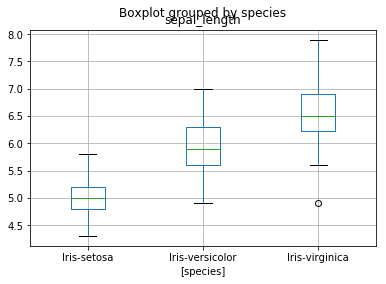

In [24]:
# 특정 피처에 따른 클래스 분류 가능성 탐색
box = df[['sepal_length', 'species']].boxplot(by='species')
# - matplotlib.pyplot 이용

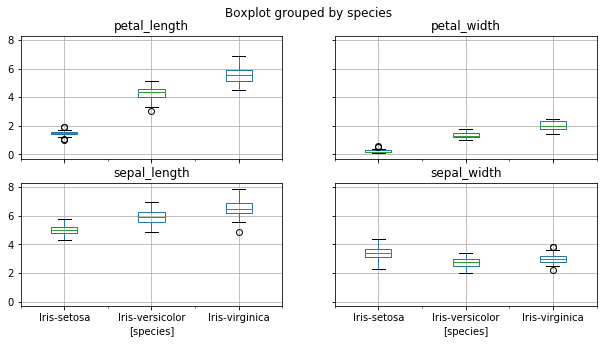

In [25]:
# 피처변수에 따른 클래스 분류 가능성 탐색
box = df.boxplot(by='species', figsize=(10, 5))
# - matplotlib.pyplot 이용

petal_length / petal_width 는 3가지 그룹이 확실하게 되어있어서 예측하기에 좋은 변수들

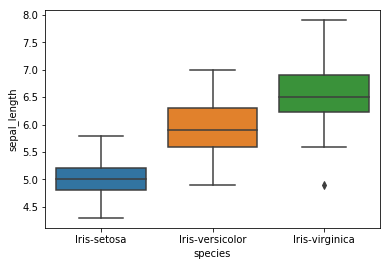

In [26]:
# 특정 피처에 따른 클래스 분류 가능성 탐색
sns.boxplot(x = "species", y = 'sepal_length', data = df)
# - seaborn 라이브러리 이용

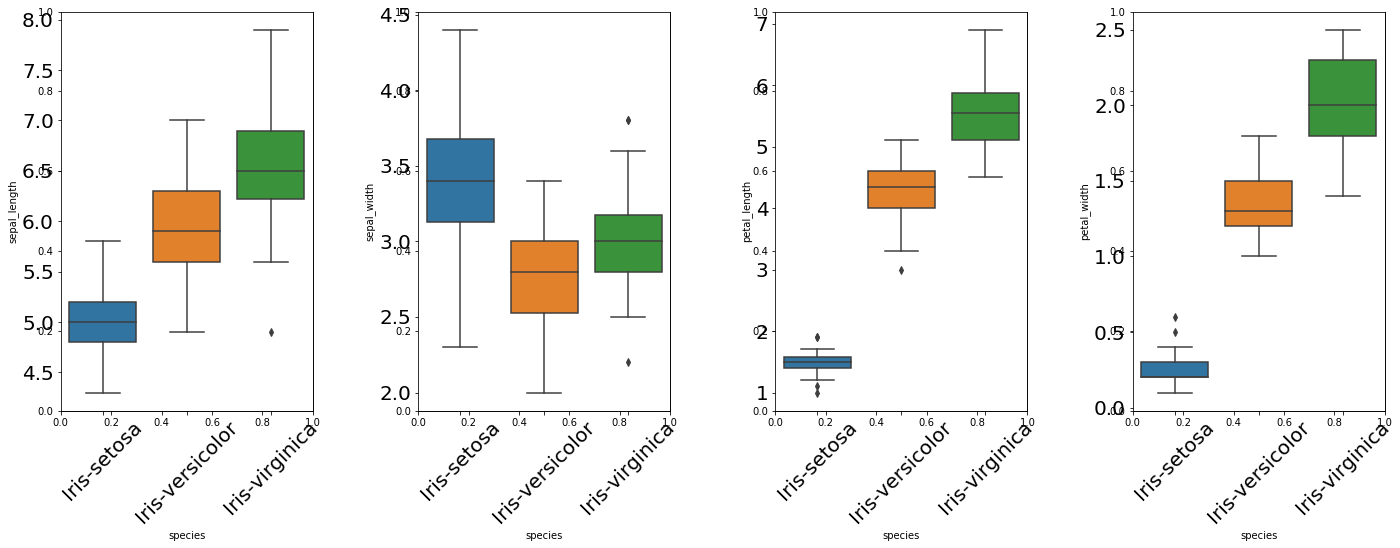

In [27]:
# 피처변수에 따른 클래스 분류 가능성 탐색
fig, axes = plt.subplots(1, 4, figsize = (20, 8))
for idx, feature in enumerate(list(df.columns)[:-1]):
    ax = fig.add_subplot(1, 4, idx + 1)
    box = sns.boxplot(x = 'species', y = feature, data = df, ax = ax)
    plt.setp(box.get_xticklabels(), fontsize = 20, rotation = 45)
    plt.setp(box.get_yticklabels(), fontsize = 20)
fig.tight_layout() 
# - seaborn 라이브러리 이용

두번째 그림은 주황색과 초록색이 겹쳐져있는 구간이 많아서 분류하기에 애매

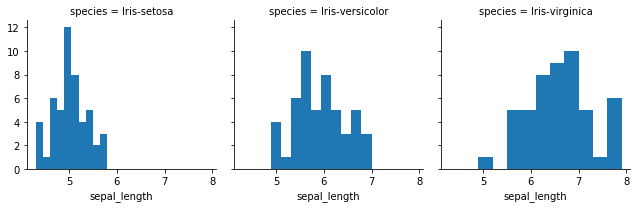

In [28]:
grid = sns.FacetGrid(df, col = 'species')
grid.map(plt.hist, 'sepal_length', bins = 10)

히스토그램을 보아도 분류될 가능성이 있겠지. iris-setosa는 5쪽에 몰려있고 iris-versikcolor는 6에 중심, iris-cirginica 는 7에 근접

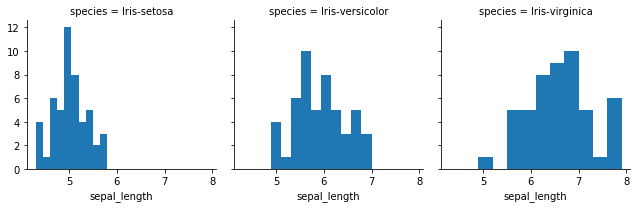

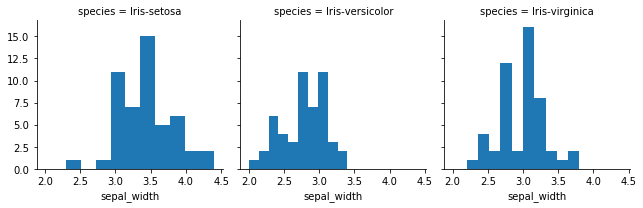

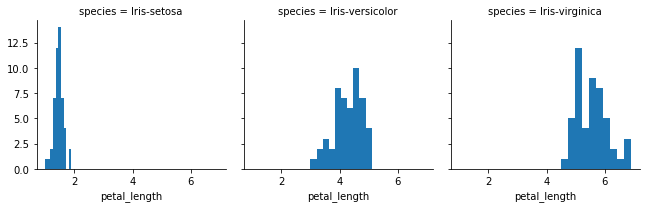

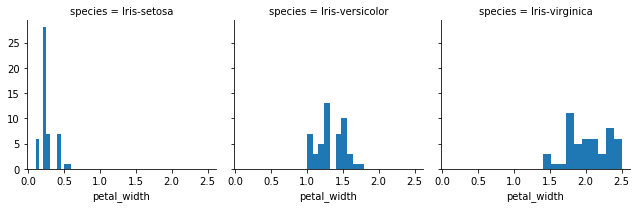

In [29]:
for idx, feature in enumerate(list(df.columns)[:-1]):
    grid = sns.FacetGrid(df, col = 'species')
    grid.map(plt.hist, feature, bins = 10)    

### 산점도 매트릭스 파악

In [30]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


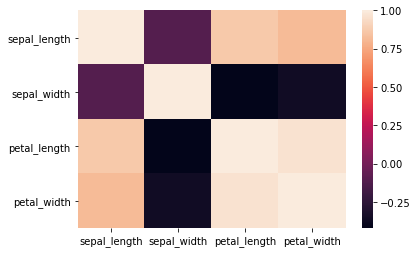

In [31]:
plt.figure()
sns.heatmap(df.corr())

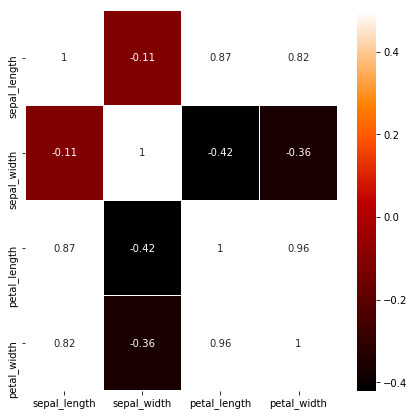

In [32]:
plt.figure(figsize = (7, 7))
sns.heatmap(df.corr(), vmax = 0.5, cmap = plt.cm.gist_heat, linewidth = 0.1, linecolor = 'white', annot = True)

C:\anaconda\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


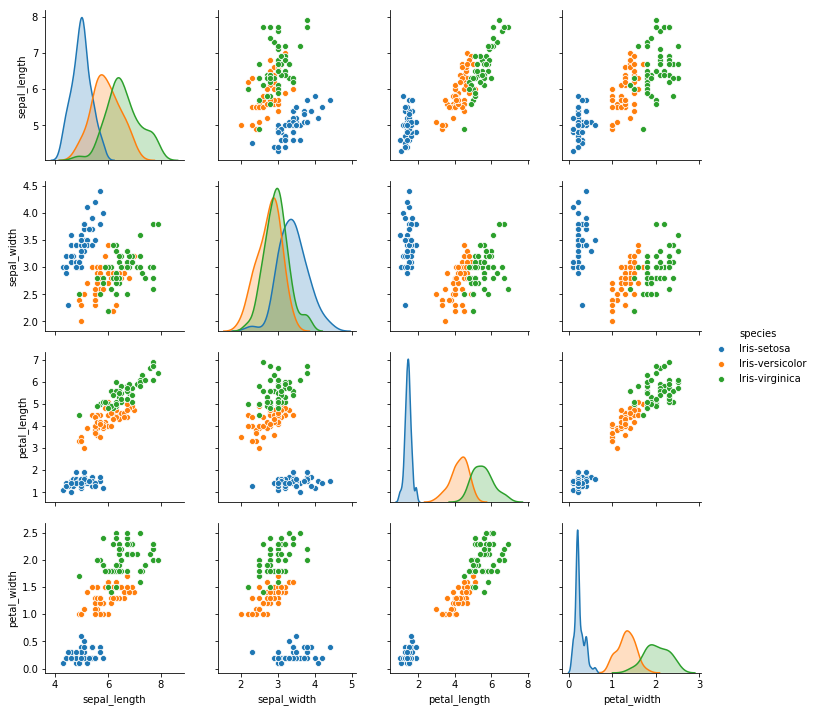

In [33]:
pp = sns.pairplot(df, hue = 'species')

C:\anaconda\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


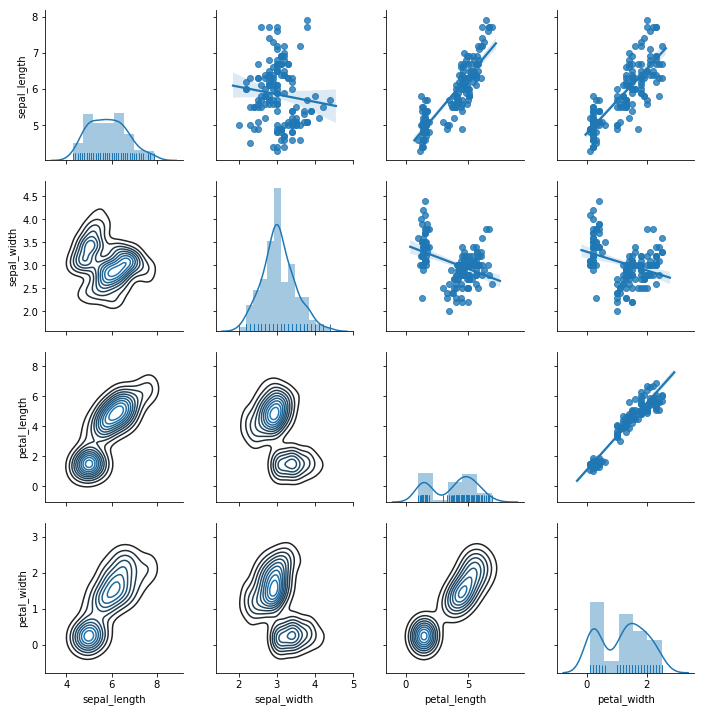

In [34]:
pair_grid = sns.PairGrid(df) 
pair_grid = pair_grid.map_upper(sns.regplot) 
pair_grid = pair_grid.map_lower(sns.kdeplot) 
pair_grid = pair_grid.map_diag(sns.distplot, rug = True) 

# <font color = 'blue'>피처변수셋과 타겟변수 준비</font>

In [35]:
# 변수컬럼명 간단확인
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


### pandas 데이터프레임 & 시리즈 객체형식으로 준비

In [36]:
X = df.iloc[:, 0:4]
print(type(X), X.shape)
X.head(3)

<class 'pandas.core.frame.DataFrame'> (150, 4)


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [37]:
y = df.iloc[:, 4]
print(type(y), y.shape)
y.head(3)

<class 'pandas.core.series.Series'> (150,)


0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
Name: species, dtype: object

### numpy 다차원 객체형식으로 준비

In [38]:
# 독립변수만 뽑기
X_arr = df.values[:, 0:4]
print(type(X_arr), X_arr.shape)

X_arr[0:10]

<class 'numpy.ndarray'> (150, 4)


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3.0, 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5.0, 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5.0, 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]], dtype=object)

In [39]:
# 종속변수만 
y_arr = df.values[:, 4]
print(type(y_arr), y_arr.shape)
y_arr[0:10]

<class 'numpy.ndarray'> (150,)


array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa'], dtype=object)

### 타겟변수 클래스별 빈도와 비율 분포

In [40]:
# pandas이용 반응(종속)변수 클래스별 빈도수 도출
print('클래스 레이블:', pd.unique(df['species']))
print('클래스 빈도수:\n', pd.value_counts(df['species']))
print()
print('클래스 레이블:', df['species'].unique())
print('클래스 빈도수:\n', df['species'].value_counts())

클래스 레이블: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
클래스 빈도수:
 Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: species, dtype: int64

클래스 레이블: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
클래스 빈도수:
 Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: species, dtype: int64


In [41]:
target_labelcount = {k: v for k, v in zip(df['species'].unique(), df['species'].value_counts())}
target_labelcount
# - 클래스 유형별 빈도수 같이 출력

{'Iris-setosa': 50, 'Iris-versicolor': 50, 'Iris-virginica': 50}

In [42]:
print(type(target_labelcount))
print(target_labelcount.keys())
print(target_labelcount.values())
print(target_labelcount.items())
print()

for k, v in target_labelcount.items(): 
    pct = v / sum(target_labelcount.values()) 
    print(f"레이블: {k:15s}, 빈도수: {v}, 비율: {pct:0.3f}") 

<class 'dict'>
dict_keys(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
dict_values([50, 50, 50])
dict_items([('Iris-setosa', 50), ('Iris-versicolor', 50), ('Iris-virginica', 50)])

레이블: Iris-setosa    , 빈도수: 50, 비율: 0.333
레이블: Iris-versicolor, 빈도수: 50, 비율: 0.333
레이블: Iris-virginica , 빈도수: 50, 비율: 0.333


### 타겟변수 문자열 레이블 숫자변환
* 딥러닝에서는 타겟변수가 문자열이 아닌 숫자로 변경해야 딥러닝 연산이 가능해짐
* 현재 타깃변수인 species는 문자열이고 다항분류이므로 원핫인코딩 변경이 필요함
* 이진분류에서 타겟변수가 숫자인 경우 0, 1로 되어 있으면 바로 사용가능함
* 만약 1, 2로 되어 있거나 3개 이상을 분류하는 다항분류의 경우에는 원핫인코딩이 필요함
* 원핫인코딩 1, 2 => 1:(1, 0), 2:(0, 1)
* 원핫인코딩 0, 1, 2 => 0:(1, 0, 0), 1:(0, 1, 0), 2:(0, 0, 1)
* 원핫인코딩 1, 2, 3 => 1:(1, 0, 0), 2:(0, 1, 0), 3:(0, 0, 1)

- 1, 2로 구분하면 성능이 2가 2배 높다고 간주하기 떄문에 0,1로 변경해주어야 한다

문자열 레이블 숫자로 변경하는 방법 2가지 [1. pandas.mape() / 2. sklearn .LabelEncoder()]

#### 1. pandas .map() 메서드 이용하여 0,1,2로 변환하기
- 숫자로 매핑해달라

In [43]:
# pandas .map() 메서드 이용 레이블 변경
df['species_num'] = y.map({'Iris-setosa':0, 
                           'Iris-versicolor':1, 
                           'Iris-virginica':2})
df['species_num'] = df['species_num'].astype('int')
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0


In [44]:
# numpy이용 반응(종속)변수 클래스별 빈도수 도출
print('클래스 레이블:', np.unique(df['species_num']))
print('클래스 빈도수:', np.bincount(df['species_num']))
df['species_num'].values

클래스 레이블: [0 1 2]
클래스 빈도수: [50 50 50]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### 2. sklearn .LabelEncoder() 메서드 이용하여 0,1,2로 변환하기

In [45]:
# sklearn LabelEncoder() 이용 레이블을 숫자로 변경함
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
# - LabelEncoder() 클래스를 레이블을 변경해주는 역할담당객체로 별도생성함

species_le = encoder.fit(df['species'])
species_le.classes_

y_num = species_le.transform(df['species'])
y_num

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

### 타겟변수 복수 숫자 레이블을 원핫인코딩으로 변환
* 타겟변수가 다항 클래스(2개 이상)인 경우 원핫인코딩으로 변경해 
<br>0과 1로 구성된 상태로 만들어야 딥러닝 연산이 가능해짐. 
<br>앞서 말했지만, 0, 1, 2로 두면 성능이 2배이상 차이난다고 간주하기 때문에 0과 1로 변환해줘야한다.

In [46]:
# 타겟변수에 있는 다항 클래스(0, 1, 2)를 원핫인코딩(0과 1)으로 변환
from keras.utils import np_utils

y_ohe = np_utils.to_categorical(y_num) # 원핫인코딩 함수 np_utrils.to_categorica()
y_ohe[0:5]

C:\anaconda\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

# <font color = 'blue'>딥러닝 모델링</font>

### 딥러닝 라이브러리 로딩

In [47]:
# 딥러닝 관련 라이브러리
import tensorflow as tf
# - 딥러닝 학습알고리즘

from keras.models import Sequential
# - 딥러닝 학습계층을 순차적으로 쌓아올릴 수 있도록 해줌

from keras.layers import Dense
# - 딥러닝 학습계층별 노드/유닛을 밀집시켜 학습방법을 설정할 수 있도록 해줌

### 랜덤 시드넘버 설정

In [48]:
# 무작위 시드넘버 설정으로 샘플 재현성 확보
myseed = 0

import numpy as np
np.random.seed(myseed)
tf.set_random_seed(myseed)

### 모델 훈련계층 설정
* 다항클래스에 대한 분류예측이므로 활성화함수로 소프트맥스(softmax) 함수 필요함
* softmax는 입력값을 활용해 출력값으로 0 ~ 1사이의 값으로 모두 정규화하며, 이들의 총합이 항상 1로 만들어 주는 특성을 가짐
<img src = './../../images/md_iris_softmax.png'>

In [49]:
# 딥러닝 학습계층 시퀀스객체 로딩
md = Sequential()
# - 딥러닝 학습계층을 순차적으로 쌓아올릴 수 있는 Sequential()메서드를 md라는 객체로 로딩함

# 딥러닝 학습계층 설계
# - Dense() 객체로 학습계층별로 여러 개 노드가 밀집된 신경망을 구현함
# - 입력층(4개노드)-은닉층(16개노드)-출력층(3개노드)

# 입력층(4개노드) + 은닉층(16개노드)
md.add(Dense(16, input_dim = 4, activation = 'relu'))
# - 딥러닝 학습계층 1번째로 input_dim 으로 입력층 + 은닉층 역할 수행
# - input_dim은 피처셋의 예측(입력;독립)변수 갯수로 입력층에 4개노드 지정
#   첫번째 레이어 이후로는 입력개수 지정 불필요
#   앞 레이어의 출력갯수가 이후 뒤 레이어의 입력개수가 됨
# - Dense 함수로 은닉층에 16개의 노드를 만듦
# - activation = 'relu'로 활성화함수 지정해 해당층의 학습결과를 다음층으로 넘김

# 출력층(3개노드)
md.add(Dense(3, activation = 'softmax'))
# - 딥러닝 학습계층 2번째로 출력층 역할
# - 출력값을 3개로 정해서 보여주기 위해서 3개 노드로 설정함
# - activation = 'softmax'로 활성화함수 지정해 
#   최종적인 출력값을 0, 0, 1과 같은 원핫인코딩 방식으로 도출

### 모델 훈련방법 설정

In [50]:
# 준비된 학습계층의 학습방법 설정
md.compile(loss = 'categorical_crossentropy', 
           optimizer = 'adam', metrics = ['accuracy'])

# - loss: 학습시 오차를 어떻방법으로 계산할지 설정
# - optimizser: 발생하는 오차를 어떤방법으로 줄여나갈지 설정
#   binary_crossentropy: 이항분류(binary-class classification)에 적합함
#   categorical_crossentropy: 다항분류(multi-class classification)에 적합함
# - metrics: 모형의 성능을 평가하는 기준으로 어떤 것을 사용할지 설정

### 모델 훈련실시

In [51]:
# 딥러닝 모델 최적화 훈련진행
# - 준비된 훈련계층과 훈련방법에 따라 미니배치(mini-batch) 방식으로 최적화 훈련진행
# - 훈련데이터셋을 한번에 투입해 또는 한개 샘플씩 학습을 하지 않고, 
#   일부(batch_size) 단위샘플로 나누어서 부분적으로 학습을 진행함
# - 미니배치를 하나씩 학습모델에 투입해 손실함수값을 줄이기 위한 파라미터(가중치, 편향)를 조율해 나감
# - 각 미니배치별 손실함수값을 구하고, 이들의 평균적인 오차와 정확도를 해당 모델의 성능으로 판단함
# - 또한 미니배치 단위샘플을 모두 사용하는 일련의 학습과정(에포크: epoch)을 
#   한번에 끝내는 것이 아니라 여러차례 반복실시해 모델의 성능을 개선해 나감  

md.fit(X, y_ohe, batch_size = 10, epochs = 200)
# - 훈련셋을 10개 샘플씩 나누어 미니배치를 여러개 만들고 
#   이를 모두 활용하는 딥러닝 학습을 총 200번 반복실시함

# - batch_size: 훈련데이터셋중에서 몇개 샘플을 미니배치(mini-batch)로 만들것인지 설정
#   적게설정: 빠른 훈련속도이점. 단위샘플셋에 따라 학습편차가 많이 발생. 병렬연산 못하고 하드웨어 자원낭비
#   많이설정: 훈련속도가 느려짐. 지역최소값(local minimum)에 빠질 수 있음. 하드웨어 자원에 부하가 많이 발생함)
# - epochs: 미니배치를 모두 처리하는 일련의 학습을 몇 번 정도 실시할지 설정
#   적게설정: 파라미터조율이 충분하지 않아서 과소적합 가능성
#   많이설정: 파라미터조율이 지나쳐 과대적합 가능성

# - 출력내용 중 
#   loss:훈련셋 오차, acc:훈런셋 정확도, 
#   ETA:estimated time of arrival
#   step: Weight와 Bias를 1회 업데이트하는 단위작업

Epoch 1/200
150/150 [==============================] - 0s 3ms/step - loss: 2.1639 - acc: 0.3333
Epoch 2/200
150/150 [==============================] - 0s 147us/step - loss: 1.8441 - acc: 0.3333
Epoch 3/200
150/150 [==============================] - 0s 161us/step - loss: 1.6389 - acc: 0.3200
Epoch 4/200
150/150 [==============================] - 0s 147us/step - loss: 1.5097 - acc: 0.3733
Epoch 5/200
150/150 [==============================] - 0s 153us/step - loss: 1.4192 - acc: 0.3667
Epoch 6/200
150/150 [==============================] - 0s 207us/step - loss: 1.3336 - acc: 0.4267
Epoch 7/200
150/150 [==============================] - 0s 167us/step - loss: 1.2697 - acc: 0.4600
Epoch 8/200
150/150 [==============================] - 0s 180us/step - loss: 1.2111 - acc: 0.4200
Epoch 9/200
150/150 [==============================] - 0s 167us/step - loss: 1.1572 - acc: 0.4600
Epoch 10/200
150/150 [==============================] - 0s 160us/step - loss: 1.1094 - acc: 0.4267
Epoch 11/200
150/150 

150/150 [==============================] - 0s 153us/step - loss: 0.2720 - acc: 0.9800
Epoch 84/200
150/150 [==============================] - 0s 180us/step - loss: 0.2711 - acc: 0.9600
Epoch 85/200
150/150 [==============================] - 0s 167us/step - loss: 0.2671 - acc: 0.9733
Epoch 86/200
150/150 [==============================] - 0s 167us/step - loss: 0.2648 - acc: 0.9800
Epoch 87/200
150/150 [==============================] - 0s 160us/step - loss: 0.2622 - acc: 0.9733
Epoch 88/200
150/150 [==============================] - 0s 180us/step - loss: 0.2613 - acc: 0.9733
Epoch 89/200
150/150 [==============================] - 0s 153us/step - loss: 0.2580 - acc: 0.9733
Epoch 90/200
150/150 [==============================] - 0s 160us/step - loss: 0.2559 - acc: 0.9800
Epoch 91/200
150/150 [==============================] - 0s 193us/step - loss: 0.2542 - acc: 0.9667
Epoch 92/200
150/150 [==============================] - 0s 153us/step - loss: 0.2514 - acc: 0.9733
Epoch 93/200
150/150 [=

150/150 [==============================] - 0s 167us/step - loss: 0.1478 - acc: 0.9800
Epoch 165/200
150/150 [==============================] - 0s 173us/step - loss: 0.1476 - acc: 0.9800
Epoch 166/200
150/150 [==============================] - 0s 153us/step - loss: 0.1464 - acc: 0.9800
Epoch 167/200
150/150 [==============================] - 0s 160us/step - loss: 0.1459 - acc: 0.9733
Epoch 168/200
150/150 [==============================] - 0s 147us/step - loss: 0.1444 - acc: 0.9800
Epoch 169/200
150/150 [==============================] - 0s 173us/step - loss: 0.1437 - acc: 0.9800
Epoch 170/200
150/150 [==============================] - 0s 160us/step - loss: 0.1433 - acc: 0.9800
Epoch 171/200
150/150 [==============================] - 0s 140us/step - loss: 0.1430 - acc: 0.9733
Epoch 172/200
150/150 [==============================] - 0s 180us/step - loss: 0.1455 - acc: 0.9733
Epoch 173/200
150/150 [==============================] - 0s 147us/step - loss: 0.1401 - acc: 0.9800
Epoch 174/200


### 모델 성능평가

In [52]:
md_perf = md.evaluate(X, y_ohe)

print('모델성능 종합:', [round(i, 3) for i in md_perf])
print(f'모델성능 오차(loss): {md_perf[0]:11.3f}')
print(f'모델성능 정확도(accuracy): {md_perf[1]:0.3f}')

150/150 [==============================] - 0s 327us/step
모델성능 종합: [0.122, 0.973]
모델성능 오차(loss):       0.122
모델성능 정확도(accuracy): 0.973


In [53]:
# y예측치 도출
md_y_pred = md.predict_classes(X)
md_y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [54]:
# sklearn 성능평가 모듈 로딩
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [55]:
# 실제y값과 예측y값 간의 혼동표 생성 confusion_matrix(실제 값, 예측 값) -> 숫자로 바꿔준 종속변수 y 실제값을 넣어줘야 혼동표나옴. string X
cm = confusion_matrix(y_num, md_y_pred)
cm

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  2, 48]], dtype=int64)

confusion_matrix를 통해 0을 잘 찾는지, 1을 잘 찾는지 아는게 중요

In [56]:
# 혼동표 성능분석
print(classification_report(y_num, md_y_pred,
                            target_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.96      0.96      0.96        50
 Iris-virginica       0.96      0.96      0.96        50

    avg / total       0.97      0.97      0.97       150



precision : 얼마나 정확하게 찾았냐 ,전체데이터 중에서 정확한 값을 찾은 경우 <br>
recall : 실제 real 데이터 중 얼마나 정확히 찾았냐 <br>
f1-score : 둘간의 조화

# <font color = 'blue'>딥러닝 모델 수정설정</font>

#### 딥러닝 모델계층 설정
* <font color = 'red'>md  모델</font>: 입력층(4개노드)-은닉층(16개노드)-출력층(3개노드)
* <font color = 'red'>md2 모델</font>: 입력층(4개노드)-은닉층(16개노드)-은닉층(24개노드)-출력층(3개노드)
* <font color = 'red'>md3 모델</font></font>: 입력층(4개노드)-은닉층(16개노드)-출력층(3개노드)
* <font color = 'red'>md4 모델</font>: 입력층(4개노드)-은닉층(16개노드)-은닉층(24개노드)-은닉층(12개노드)-출력층(3개노드)

#### 딥러닝 학습방법 설정
* 모든모델 동일: md.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

#### 딥러닝 모델에 데이터 피팅방법 설정
* md.fit(X, y_ohe, epochs = 200, batch_size = 10)
* md2.fit(X, y_ohe, epochs = 200, batch_size = 10)
* md3.fit(X, y_ohe, epochs = 1000, batch_size = 50)
* md4.fit(X, y_ohe, epochs = 2000, batch_size = 100)

### (1) 딥러닝 모델의 은닉층 갯수 또는 노드의 갯수 변화

#### 랜덤 시드넘버 설정

In [57]:
# 무작위 시드넘버 설정으로 샘플 재현성 확보
myseed = 0

import numpy as np
np.random.seed(myseed)
tf.set_random_seed(myseed)

#### <font color = 'red'>(수정)</font>  모델 훈련계층 설정

In [58]:
# 기존모델
# - 입력층(4개노드)-은닉층(16개노드)-출력층(3개노드)

# 신규모델
# - 입력층(4개노드)-은닉층(16개노드)-은닉층(24개노드)-출력층(3개노드)

md2 = Sequential()

md2.add(Dense(16, input_dim = 4, activation = 'relu'))
md2.add(Dense(24, activation = 'relu'))
md2.add(Dense(3, activation = 'softmax'))

#### (동일) 모델 훈련방법 설정

In [59]:
# 준비된 학습계층의 학습방법 설정
md2.compile(loss = 'categorical_crossentropy', 
            optimizer = 'adam', metrics = ['accuracy'])
# - 분류예측 중 다항 클래스 분류문제이므로 loss = 'categorical_crossentropy'로 설정
# - 오류를 수정해 나가는 최적화 함수는 optimizer = 'adam'으로 설정
# - 훈련모델의 성능 평가메트릭은 metrics = ['accuracy'] 정확도로 설정

#### (동일) 모델 훈련실시

In [60]:
# 딥러닝 학습계층모델에 데이터 피팅
md2.fit(X, y_ohe, batch_size = 10, epochs = 200)
# - 훈련셋을 10개 샘플씩 나누어 미니배치를 여러개 만들고 
#   이를 모두 활용하는 딥러닝 학습을 총 200번 반복실시함

Epoch 1/200
150/150 [==============================] - 0s 2ms/step - loss: 1.4196 - acc: 0.2867
Epoch 2/200
150/150 [==============================] - 0s 167us/step - loss: 1.2752 - acc: 0.2400
Epoch 3/200
150/150 [==============================] - 0s 180us/step - loss: 1.1673 - acc: 0.2867
Epoch 4/200
150/150 [==============================] - 0s 160us/step - loss: 1.0840 - acc: 0.3800
Epoch 5/200
150/150 [==============================] - 0s 153us/step - loss: 1.0242 - acc: 0.4400
Epoch 6/200
150/150 [==============================] - 0s 220us/step - loss: 0.9740 - acc: 0.6600
Epoch 7/200
150/150 [==============================] - 0s 153us/step - loss: 0.9336 - acc: 0.8267
Epoch 8/200
150/150 [==============================] - 0s 173us/step - loss: 0.8927 - acc: 0.8200
Epoch 9/200
150/150 [==============================] - 0s 160us/step - loss: 0.8462 - acc: 0.8667
Epoch 10/200
150/150 [==============================] - 0s 170us/step - loss: 0.7965 - acc: 0.8400
Epoch 11/200
150/150 

150/150 [==============================] - 0s 173us/step - loss: 0.0859 - acc: 0.9733
Epoch 83/200
150/150 [==============================] - 0s 167us/step - loss: 0.0785 - acc: 0.9733
Epoch 84/200
150/150 [==============================] - 0s 173us/step - loss: 0.0846 - acc: 0.9733
Epoch 85/200
150/150 [==============================] - 0s 160us/step - loss: 0.0809 - acc: 0.9733
Epoch 86/200
150/150 [==============================] - 0s 180us/step - loss: 0.0759 - acc: 0.9733
Epoch 87/200
150/150 [==============================] - 0s 173us/step - loss: 0.0748 - acc: 0.9667
Epoch 88/200
150/150 [==============================] - 0s 167us/step - loss: 0.0749 - acc: 0.9600
Epoch 89/200
150/150 [==============================] - 0s 167us/step - loss: 0.0748 - acc: 0.9667
Epoch 90/200
150/150 [==============================] - 0s 173us/step - loss: 0.0735 - acc: 0.9600
Epoch 91/200
150/150 [==============================] - 0s 147us/step - loss: 0.0732 - acc: 0.9733
Epoch 92/200
150/150 [=

150/150 [==============================] - 0s 140us/step - loss: 0.0700 - acc: 0.9733
Epoch 164/200
150/150 [==============================] - 0s 153us/step - loss: 0.0608 - acc: 0.9800
Epoch 165/200
150/150 [==============================] - 0s 167us/step - loss: 0.0601 - acc: 0.9733
Epoch 166/200
150/150 [==============================] - 0s 173us/step - loss: 0.0623 - acc: 0.9733
Epoch 167/200
150/150 [==============================] - 0s 200us/step - loss: 0.0670 - acc: 0.9733
Epoch 168/200
150/150 [==============================] - 0s 173us/step - loss: 0.0604 - acc: 0.9800
Epoch 169/200
150/150 [==============================] - 0s 213us/step - loss: 0.0611 - acc: 0.9733
Epoch 170/200
150/150 [==============================] - 0s 167us/step - loss: 0.0655 - acc: 0.9667
Epoch 171/200
150/150 [==============================] - 0s 173us/step - loss: 0.0680 - acc: 0.9733
Epoch 172/200
150/150 [==============================] - 0s 200us/step - loss: 0.0683 - acc: 0.9733
Epoch 173/200


#### 모델 성능평가

In [61]:
md2_perf = md2.evaluate(X, y_ohe)

print('모델성능 종합:', [round(i, 3) for i in md2_perf])
print(f'모델성능 오차(loss): {md2_perf[0]:11.3f}')
print(f'모델성능 정확도(accuracy): {md2_perf[1]:0.3f}')

150/150 [==============================] - 0s 460us/step
모델성능 종합: [0.059, 0.98]
모델성능 오차(loss):       0.059
모델성능 정확도(accuracy): 0.980


In [62]:
# y예측치 도출
md2_y_pred = md2.predict_classes(X)
md2_y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

.predict_classes(X)는 예측한 값을 소수점 값이 아닌 클래스로 예측을 해달라는 의미

In [63]:
# sklearn 성능평가 모듈 로딩
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [64]:
# 실제y값과 예측y값 간의 혼동표 생성
cm = confusion_matrix(y_num, md2_y_pred)
cm

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  2, 48]], dtype=int64)

In [65]:
# 혼동표 성능분석
print(classification_report(y_num, md2_y_pred,
                            target_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.96      0.98      0.97        50
 Iris-virginica       0.98      0.96      0.97        50

    avg / total       0.98      0.98      0.98       150



### (2) 딥러닝 모델의 피팅방법 변화

#### 랜덤 시드넘버 설정

In [66]:
# 무작위 시드넘버 설정으로 샘플 재현성 확보
myseed = 0

import numpy as np
np.random.seed(myseed)
tf.set_random_seed(myseed)

#### (동일) 모델 훈련계층 설정

In [67]:
# 기존모델
# - 입력층(4개노드)-은닉층(16개노드)-출력층(3개노드)

md3 = Sequential()

md3.add(Dense(16, input_dim = 4, activation = 'relu'))
md3.add(Dense(3, activation = 'softmax'))

#### (동일) 모델 훈련방법 설정

In [68]:
# 준비된 학습계층의 학습방법 설정
md3.compile(loss = 'categorical_crossentropy', 
            optimizer = 'adam', metrics = ['accuracy'])
# - 분류예측 중 다항 클래스 분류문제이므로 loss = 'categorical_crossentropy'로 설정
# - 오류를 수정해 나가는 최적화 함수는 optimizer = 'adam'으로 설정
# - 훈련모델의 성능 평가메트릭은 metrics = ['accuracy'] 정확도로 설정

#### <font color = 'red'>(수정)</font>  모델 훈련실시

#### 모델 성능평가

In [70]:
md3_perf = md3.evaluate(X, y_ohe)

print('모델성능 종합:', [round(i, 3) for i in md3_perf])
print(f'모델성능 오차(loss): {md3_perf[0]:11.3f}')
print(f'모델성능 정확도(accuracy): {md3_perf[1]:0.3f}')

150/150 [==============================] - 0s 647us/step
모델성능 종합: [0.073, 0.98]
모델성능 오차(loss):       0.073
모델성능 정확도(accuracy): 0.980


In [71]:
# y예측치 도출
md3_y_pred = md.predict_classes(X)
md3_y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [72]:
# sklearn 성능평가 모듈 로딩
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [73]:
# 실제y값과 예측y값 간의 혼동표 생성
cm = confusion_matrix(y_num, md3_y_pred)
cm

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  2, 48]], dtype=int64)

In [74]:
# 혼동표 성능분석
print(classification_report(y_num, md3_y_pred,
                            target_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.96      0.96      0.96        50
 Iris-virginica       0.96      0.96      0.96        50

    avg / total       0.97      0.97      0.97       150



### (3) 딥러닝 모델의 은닉층/노드 갯수 & 피팅방법 변화

#### 랜덤 시드넘버 설정

In [75]:
# 무작위 시드넘버 설정으로 샘플 재현성 확보
myseed = 0

import numpy as np
np.random.seed(myseed)
tf.set_random_seed(myseed)

#### <font color = 'red'>(수정)</font>  모델 훈련계층 설정

In [76]:
# 기존모델
# - 입력층(4개노드)-은닉층(16개노드)-출력층(3개노드)

# 신규모델
# - 입력층(4개노드)-은닉층(16개노드)-은닉층(24개노드)-은닉층(12개노드)-출력층(3개노드)

md4 = Sequential()

 # 입력층이 4개 은닉층이 3개
md4.add(Dense(16, input_dim = 4, activation = 'relu')) # 입력층 4개 설정
md4.add(Dense(24, activation = 'relu')) # 은닉층1
md4.add(Dense(12, activation = 'relu')) # 은닉층2
md4.add(Dense(3, activation = 'softmax')) # 은닉층3

#### (동일) 모델 훈련방법 설정

In [77]:
# 준비된 학습계층의 학습방법 설정
md4.compile(loss = 'categorical_crossentropy', 
            optimizer = 'adam', metrics = ['accuracy'])
# - 분류예측 중 다항 클래스 분류문제이므로 loss = 'categorical_crossentropy'로 설정
# - 오류를 수정해 나가는 최적화 함수는 optimizer = 'adam'으로 설정
# - 훈련모델의 성능 평가메트릭은 metrics = ['accuracy'] 정확도로 설정

#### <font color = 'red'>(수정)</font> 모델 훈련실시

In [78]:
# 딥러닝 학습계층모델에 데이터 피팅

# 기존 피팅방법
# md.fit(X, y_ohe, epochs = 2000, batch_size = 100)

# 수정된 피팅방법
md4.fit(X, y_ohe, batch_size = 100, epochs = 2000)
# - 훈련셋을 50개 샘플씩 나누어 미니배치를 여러개 만들고 
#   이를 모두 활용하는 딥러닝 학습을 총 2000번 반복실시함

Epoch 1/2000
150/150 [==============================] - 0s 3ms/step - loss: 1.1313 - acc: 0.3333
Epoch 2/2000
150/150 [==============================] - 0s 47us/step - loss: 1.1010 - acc: 0.3333
Epoch 3/2000
150/150 [==============================] - 0s 47us/step - loss: 1.0737 - acc: 0.3667
Epoch 4/2000
150/150 [==============================] - 0s 47us/step - loss: 1.0509 - acc: 0.4933
Epoch 5/2000
150/150 [==============================] - 0s 60us/step - loss: 1.0316 - acc: 0.5467
Epoch 6/2000
150/150 [==============================] - 0s 47us/step - loss: 1.0149 - acc: 0.5867
Epoch 7/2000
150/150 [==============================] - 0s 53us/step - loss: 0.9992 - acc: 0.6200
Epoch 8/2000
150/150 [==============================] - 0s 53us/step - loss: 0.9858 - acc: 0.6200
Epoch 9/2000
150/150 [==============================] - 0s 47us/step - loss: 0.9742 - acc: 0.6067
Epoch 10/2000
150/150 [==============================] - 0s 53us/step - loss: 0.9620 - acc: 0.6000
Epoch 11/2000
150/15

150/150 [==============================] - 0s 57us/step - loss: 0.1344 - acc: 0.9800
Epoch 83/2000
150/150 [==============================] - 0s 50us/step - loss: 0.1316 - acc: 0.9733
Epoch 84/2000
150/150 [==============================] - 0s 67us/step - loss: 0.1293 - acc: 0.9733
Epoch 85/2000
150/150 [==============================] - 0s 47us/step - loss: 0.1258 - acc: 0.9867
Epoch 86/2000
150/150 [==============================] - 0s 60us/step - loss: 0.1236 - acc: 0.9867
Epoch 87/2000
150/150 [==============================] - 0s 53us/step - loss: 0.1210 - acc: 0.9867
Epoch 88/2000
150/150 [==============================] - 0s 53us/step - loss: 0.1174 - acc: 0.9800
Epoch 89/2000
150/150 [==============================] - 0s 60us/step - loss: 0.1166 - acc: 0.9733
Epoch 90/2000
150/150 [==============================] - 0s 47us/step - loss: 0.1152 - acc: 0.9733
Epoch 91/2000
150/150 [==============================] - 0s 53us/step - loss: 0.1104 - acc: 0.9733
Epoch 92/2000
150/150 [=

150/150 [==============================] - 0s 57us/step - loss: 0.0696 - acc: 0.9733
Epoch 164/2000
150/150 [==============================] - 0s 67us/step - loss: 0.0689 - acc: 0.9733
Epoch 165/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0672 - acc: 0.9800
Epoch 166/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0676 - acc: 0.9800
Epoch 167/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0675 - acc: 0.9800
Epoch 168/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0666 - acc: 0.9800
Epoch 169/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0672 - acc: 0.9800
Epoch 170/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0664 - acc: 0.9800
Epoch 171/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0660 - acc: 0.9800
Epoch 172/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0665 - acc: 0.9800
Epoch 173/2000


150/150 [==============================] - 0s 47us/step - loss: 0.0597 - acc: 0.9800
Epoch 244/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0602 - acc: 0.9733
Epoch 245/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0592 - acc: 0.9800
Epoch 246/2000
150/150 [==============================] - 0s 60us/step - loss: 0.0601 - acc: 0.9800
Epoch 247/2000
150/150 [==============================] - 0s 187us/step - loss: 0.0604 - acc: 0.9800
Epoch 248/2000
150/150 [==============================] - 0s 67us/step - loss: 0.0588 - acc: 0.9733
Epoch 249/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0629 - acc: 0.9867
Epoch 250/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0600 - acc: 0.9867
Epoch 251/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0592 - acc: 0.9800
Epoch 252/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0611 - acc: 0.9800
Epoch 253/2000

150/150 [==============================] - 0s 53us/step - loss: 0.0568 - acc: 0.9867
Epoch 325/2000
150/150 [==============================] - ETA: 0s - loss: 0.0666 - acc: 0.970 - 0s 53us/step - loss: 0.0559 - acc: 0.9733
Epoch 326/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0569 - acc: 0.9800
Epoch 327/2000
150/150 [==============================] - 0s 60us/step - loss: 0.0575 - acc: 0.9800
Epoch 328/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0571 - acc: 0.9800
Epoch 329/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0568 - acc: 0.9800
Epoch 330/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0566 - acc: 0.9800
Epoch 331/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0559 - acc: 0.9800
Epoch 332/2000
150/150 [==============================] - 0s 60us/step - loss: 0.0564 - acc: 0.9733
Epoch 333/2000
150/150 [==============================] - 0s 47us/step - loss

150/150 [==============================] - 0s 53us/step - loss: 0.0551 - acc: 0.9800
Epoch 405/2000
150/150 [==============================] - 0s 60us/step - loss: 0.0551 - acc: 0.9733
Epoch 406/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0554 - acc: 0.9867
Epoch 407/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0575 - acc: 0.9800
Epoch 408/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0540 - acc: 0.9800
Epoch 409/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0545 - acc: 0.9867
Epoch 410/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0544 - acc: 0.9867
Epoch 411/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0555 - acc: 0.9800
Epoch 412/2000
150/150 [==============================] - 0s 60us/step - loss: 0.0542 - acc: 0.9800
Epoch 413/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0540 - acc: 0.9800
Epoch 414/2000


150/150 [==============================] - 0s 53us/step - loss: 0.0530 - acc: 0.9800
Epoch 486/2000
150/150 [==============================] - 0s 40us/step - loss: 0.0523 - acc: 0.9800
Epoch 487/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0543 - acc: 0.9867
Epoch 488/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0548 - acc: 0.9867
Epoch 489/2000
150/150 [==============================] - 0s 67us/step - loss: 0.0530 - acc: 0.9867
Epoch 490/2000
150/150 [==============================] - ETA: 0s - loss: 0.0696 - acc: 0.970 - 0s 47us/step - loss: 0.0524 - acc: 0.9800
Epoch 491/2000
150/150 [==============================] - 0s 60us/step - loss: 0.0529 - acc: 0.9800
Epoch 492/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0537 - acc: 0.9733
Epoch 493/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0536 - acc: 0.9733
Epoch 494/2000
150/150 [==============================] - 0s 53us/step - loss

150/150 [==============================] - 0s 47us/step - loss: 0.0516 - acc: 0.9800
Epoch 566/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0521 - acc: 0.9800
Epoch 567/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0514 - acc: 0.9800
Epoch 568/2000
150/150 [==============================] - ETA: 0s - loss: 0.0202 - acc: 1.000 - 0s 53us/step - loss: 0.0536 - acc: 0.9867
Epoch 569/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0519 - acc: 0.9733
Epoch 570/2000
150/150 [==============================] - 0s 67us/step - loss: 0.0512 - acc: 0.9800
Epoch 571/2000
150/150 [==============================] - 0s 60us/step - loss: 0.0526 - acc: 0.9867
Epoch 572/2000
150/150 [==============================] - 0s 60us/step - loss: 0.0542 - acc: 0.9867
Epoch 573/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0523 - acc: 0.9867
Epoch 574/2000
150/150 [==============================] - 0s 53us/step - loss

150/150 [==============================] - 0s 60us/step - loss: 0.0499 - acc: 0.9867
Epoch 647/2000
150/150 [==============================] - 0s 40us/step - loss: 0.0512 - acc: 0.9800
Epoch 648/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0570 - acc: 0.9800
Epoch 649/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0547 - acc: 0.9800
Epoch 650/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0519 - acc: 0.9800
Epoch 651/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0519 - acc: 0.9867
Epoch 652/2000
150/150 [==============================] - 0s 60us/step - loss: 0.0522 - acc: 0.9867
Epoch 653/2000
150/150 [==============================] - 0s 60us/step - loss: 0.0515 - acc: 0.9867
Epoch 654/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0504 - acc: 0.9867
Epoch 655/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0537 - acc: 0.9800
Epoch 656/2000


150/150 [==============================] - 0s 53us/step - loss: 0.0513 - acc: 0.9867
Epoch 727/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0511 - acc: 0.9867
Epoch 728/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0497 - acc: 0.9867
Epoch 729/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0494 - acc: 0.9800
Epoch 730/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0561 - acc: 0.9733
Epoch 731/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0501 - acc: 0.9800
Epoch 732/2000
150/150 [==============================] - ETA: 0s - loss: 0.0621 - acc: 0.980 - 0s 47us/step - loss: 0.0529 - acc: 0.9867
Epoch 733/2000
150/150 [==============================] - 0s 67us/step - loss: 0.0555 - acc: 0.9800
Epoch 734/2000
150/150 [==============================] - 0s 60us/step - loss: 0.0507 - acc: 0.9867
Epoch 735/2000
150/150 [==============================] - 0s 53us/step - loss

150/150 [==============================] - 0s 53us/step - loss: 0.0517 - acc: 0.9867
Epoch 806/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0492 - acc: 0.9867
Epoch 807/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0503 - acc: 0.9867
Epoch 808/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0500 - acc: 0.9867
Epoch 809/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0487 - acc: 0.9867
Epoch 810/2000
150/150 [==============================] - 0s 60us/step - loss: 0.0513 - acc: 0.9800
Epoch 811/2000
150/150 [==============================] - 0s 60us/step - loss: 0.0519 - acc: 0.9800
Epoch 812/2000
150/150 [==============================] - 0s 63us/step - loss: 0.0522 - acc: 0.9800
Epoch 813/2000
150/150 [==============================] - 0s 50us/step - loss: 0.0489 - acc: 0.9800
Epoch 814/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0492 - acc: 0.9867
Epoch 815/2000


150/150 [==============================] - 0s 47us/step - loss: 0.0510 - acc: 0.9733
Epoch 887/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0489 - acc: 0.9800
Epoch 888/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0496 - acc: 0.9800
Epoch 889/2000
150/150 [==============================] - ETA: 0s - loss: 0.0362 - acc: 0.990 - 0s 60us/step - loss: 0.0487 - acc: 0.9867
Epoch 890/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0490 - acc: 0.9867
Epoch 891/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0488 - acc: 0.9867
Epoch 892/2000
150/150 [==============================] - 0s 67us/step - loss: 0.0484 - acc: 0.9867
Epoch 893/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0489 - acc: 0.9867
Epoch 894/2000
150/150 [==============================] - 0s 60us/step - loss: 0.0489 - acc: 0.9800
Epoch 895/2000
150/150 [==============================] - 0s 47us/step - loss

150/150 [==============================] - 0s 53us/step - loss: 0.0479 - acc: 0.9800
Epoch 967/2000
150/150 [==============================] - 0s 73us/step - loss: 0.0479 - acc: 0.9800
Epoch 968/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0494 - acc: 0.9867
Epoch 969/2000
150/150 [==============================] - 0s 60us/step - loss: 0.0485 - acc: 0.9800
Epoch 970/2000
150/150 [==============================] - 0s 60us/step - loss: 0.0481 - acc: 0.9800
Epoch 971/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0487 - acc: 0.9800
Epoch 972/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0481 - acc: 0.9800
Epoch 973/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0487 - acc: 0.9867
Epoch 974/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0479 - acc: 0.9867
Epoch 975/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0484 - acc: 0.9800
Epoch 976/2000


150/150 [==============================] - 0s 47us/step - loss: 0.0479 - acc: 0.9800
Epoch 1047/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0477 - acc: 0.9800
Epoch 1048/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0471 - acc: 0.9867
Epoch 1049/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0475 - acc: 0.9867
Epoch 1050/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0525 - acc: 0.9867
Epoch 1051/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0468 - acc: 0.9867
Epoch 1052/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0483 - acc: 0.9800
Epoch 1053/2000
150/150 [==============================] - 0s 67us/step - loss: 0.0525 - acc: 0.9800
Epoch 1054/2000
150/150 [==============================] - 0s 60us/step - loss: 0.0540 - acc: 0.9800
Epoch 1055/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0494 - acc: 0.9800
Epoch 

150/150 [==============================] - 0s 53us/step - loss: 0.0486 - acc: 0.9867
Epoch 1127/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0499 - acc: 0.9867
Epoch 1128/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0481 - acc: 0.9867
Epoch 1129/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0466 - acc: 0.9867
Epoch 1130/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0496 - acc: 0.9800
Epoch 1131/2000
150/150 [==============================] - 0s 73us/step - loss: 0.0478 - acc: 0.9800
Epoch 1132/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0474 - acc: 0.9800
Epoch 1133/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0471 - acc: 0.9867
Epoch 1134/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0476 - acc: 0.9867
Epoch 1135/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0474 - acc: 0.9867
Epoch 

150/150 [==============================] - 0s 47us/step - loss: 0.0477 - acc: 0.9800
Epoch 1206/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0467 - acc: 0.9800
Epoch 1207/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0471 - acc: 0.9867
Epoch 1208/2000
150/150 [==============================] - 0s 40us/step - loss: 0.0475 - acc: 0.9867
Epoch 1209/2000
150/150 [==============================] - 0s 60us/step - loss: 0.0471 - acc: 0.9867
Epoch 1210/2000
150/150 [==============================] - ETA: 0s - loss: 0.0337 - acc: 0.990 - 0s 53us/step - loss: 0.0482 - acc: 0.9867
Epoch 1211/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0466 - acc: 0.9867
Epoch 1212/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0465 - acc: 0.9867
Epoch 1213/2000
150/150 [==============================] - 0s 40us/step - loss: 0.0466 - acc: 0.9800
Epoch 1214/2000
150/150 [==============================] - 0s 47us/st

150/150 [==============================] - 0s 53us/step - loss: 0.0457 - acc: 0.9867
Epoch 1286/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0484 - acc: 0.9800
Epoch 1287/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0484 - acc: 0.9800
Epoch 1288/2000
150/150 [==============================] - 0s 60us/step - loss: 0.0467 - acc: 0.9800
Epoch 1289/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0462 - acc: 0.9800
Epoch 1290/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0459 - acc: 0.9867
Epoch 1291/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0460 - acc: 0.9867
Epoch 1292/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0460 - acc: 0.9867
Epoch 1293/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0461 - acc: 0.9867
Epoch 1294/2000
150/150 [==============================] - 0s 60us/step - loss: 0.0467 - acc: 0.9800
Epoch 

150/150 [==============================] - 0s 53us/step - loss: 0.0462 - acc: 0.9800
Epoch 1366/2000
150/150 [==============================] - 0s 60us/step - loss: 0.0472 - acc: 0.9867
Epoch 1367/2000
150/150 [==============================] - 0s 60us/step - loss: 0.0470 - acc: 0.9867
Epoch 1368/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0468 - acc: 0.9867
Epoch 1369/2000
150/150 [==============================] - 0s 40us/step - loss: 0.0457 - acc: 0.9800
Epoch 1370/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0458 - acc: 0.9800
Epoch 1371/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0467 - acc: 0.9800
Epoch 1372/2000
150/150 [==============================] - 0s 40us/step - loss: 0.0467 - acc: 0.9800
Epoch 1373/2000
150/150 [==============================] - 0s 73us/step - loss: 0.0444 - acc: 0.9800
Epoch 1374/2000
150/150 [==============================] - 0s 40us/step - loss: 0.0483 - acc: 0.9867
Epoch 

150/150 [==============================] - 0s 47us/step - loss: 0.0457 - acc: 0.9800
Epoch 1446/2000
150/150 [==============================] - 0s 60us/step - loss: 0.0452 - acc: 0.9867
Epoch 1447/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0453 - acc: 0.9867
Epoch 1448/2000
150/150 [==============================] - 0s 40us/step - loss: 0.0473 - acc: 0.9867
Epoch 1449/2000
150/150 [==============================] - 0s 60us/step - loss: 0.0481 - acc: 0.9867
Epoch 1450/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0457 - acc: 0.9867
Epoch 1451/2000
150/150 [==============================] - 0s 60us/step - loss: 0.0451 - acc: 0.9867
Epoch 1452/2000
150/150 [==============================] - 0s 40us/step - loss: 0.0457 - acc: 0.9800
Epoch 1453/2000
150/150 [==============================] - 0s 73us/step - loss: 0.0465 - acc: 0.9800
Epoch 1454/2000
150/150 [==============================] - 0s 50us/step - loss: 0.0464 - acc: 0.9800
Epoch 

150/150 [==============================] - 0s 53us/step - loss: 0.0459 - acc: 0.9867
Epoch 1526/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0474 - acc: 0.9867
Epoch 1527/2000
150/150 [==============================] - 0s 40us/step - loss: 0.0453 - acc: 0.9867
Epoch 1528/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0449 - acc: 0.9867
Epoch 1529/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0450 - acc: 0.9867
Epoch 1530/2000
150/150 [==============================] - 0s 67us/step - loss: 0.0460 - acc: 0.9867
Epoch 1531/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0464 - acc: 0.9867
Epoch 1532/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0455 - acc: 0.9867
Epoch 1533/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0449 - acc: 0.9867
Epoch 1534/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0449 - acc: 0.9867
Epoch 

150/150 [==============================] - 0s 53us/step - loss: 0.0453 - acc: 0.9800
Epoch 1606/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0448 - acc: 0.9867
Epoch 1607/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0448 - acc: 0.9867
Epoch 1608/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0447 - acc: 0.9867
Epoch 1609/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0447 - acc: 0.9867
Epoch 1610/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0446 - acc: 0.9867
Epoch 1611/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0444 - acc: 0.9800
Epoch 1612/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0453 - acc: 0.9800
Epoch 1613/2000
150/150 [==============================] - ETA: 0s - loss: 0.0609 - acc: 0.970 - 0s 60us/step - loss: 0.0464 - acc: 0.9800
Epoch 1614/2000
150/150 [==============================] - 0s 53us/st

150/150 [==============================] - 0s 53us/step - loss: 0.0443 - acc: 0.9800
Epoch 1686/2000
150/150 [==============================] - 0s 40us/step - loss: 0.0442 - acc: 0.9800
Epoch 1687/2000
150/150 [==============================] - 0s 40us/step - loss: 0.0443 - acc: 0.9867
Epoch 1688/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0443 - acc: 0.9867
Epoch 1689/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0449 - acc: 0.9867
Epoch 1690/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0449 - acc: 0.9867
Epoch 1691/2000
150/150 [==============================] - 0s 67us/step - loss: 0.0443 - acc: 0.9867
Epoch 1692/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0443 - acc: 0.9867
Epoch 1693/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0442 - acc: 0.9867
Epoch 1694/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0441 - acc: 0.9867
Epoch 

150/150 [==============================] - 0s 47us/step - loss: 0.0446 - acc: 0.9867
Epoch 1766/2000
150/150 [==============================] - 0s 60us/step - loss: 0.0447 - acc: 0.9867
Epoch 1767/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0441 - acc: 0.9867
Epoch 1768/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0445 - acc: 0.9867
Epoch 1769/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0440 - acc: 0.9867
Epoch 1770/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0441 - acc: 0.9867
Epoch 1771/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0442 - acc: 0.9800
Epoch 1772/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0443 - acc: 0.9800
Epoch 1773/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0443 - acc: 0.9800
Epoch 1774/2000
150/150 [==============================] - 0s 40us/step - loss: 0.0440 - acc: 0.9867
Epoch 

150/150 [==============================] - 0s 47us/step - loss: 0.0444 - acc: 0.9867
Epoch 1846/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0449 - acc: 0.9867
Epoch 1847/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0454 - acc: 0.9800
Epoch 1848/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0438 - acc: 0.9800
Epoch 1849/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0455 - acc: 0.9867
Epoch 1850/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0457 - acc: 0.9867
Epoch 1851/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0433 - acc: 0.9867
Epoch 1852/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0443 - acc: 0.9800
Epoch 1853/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0468 - acc: 0.9733
Epoch 1854/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0465 - acc: 0.9733
Epoch 

150/150 [==============================] - 0s 53us/step - loss: 0.0454 - acc: 0.9800
Epoch 1926/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0441 - acc: 0.9800
Epoch 1927/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0444 - acc: 0.9867
Epoch 1928/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0444 - acc: 0.9867
Epoch 1929/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0446 - acc: 0.9867
Epoch 1930/2000
150/150 [==============================] - 0s 40us/step - loss: 0.0439 - acc: 0.9867
Epoch 1931/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0436 - acc: 0.9867
Epoch 1932/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0437 - acc: 0.9867
Epoch 1933/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0435 - acc: 0.9867
Epoch 1934/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0445 - acc: 0.9800
Epoch 

#### 모델 성능평가

In [79]:
md4_perf = md4.evaluate(X, y_ohe)

print('모델성능 종합:', [round(i, 3) for i in md4_perf])
print(f'모델성능 오차(loss): {md4_perf[0]:11.3f}')
print(f'모델성능 정확도(accuracy): {md4_perf[1]:0.3f}')

150/150 [==============================] - 0s 951us/step
모델성능 종합: [0.043, 0.987]
모델성능 오차(loss):       0.043
모델성능 정확도(accuracy): 0.987


In [80]:
# y예측치 도출
md4_y_pred = md.predict_classes(X)
md4_y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [81]:
# sklearn 성능평가 모듈 로딩
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [82]:
# 실제y값과 예측y값 간의 혼동표 생성
cm = confusion_matrix(y_num, md4_y_pred)
cm

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  2, 48]], dtype=int64)

In [83]:
# 혼동표 성능분석
print(classification_report(y_num, md4_y_pred,
                            target_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.96      0.96      0.96        50
 Iris-virginica       0.96      0.96      0.96        50

    avg / total       0.97      0.97      0.97       150



# <font color = 'blue'>딥러닝 모델간 성능평가 비교</font>

### 모델간 성능평가 비교

In [84]:
# 딥러닝 모델별 성능평가 결합
model_perf = [md_perf, md2_perf, md3_perf, md4_perf]
model_perf_loss = [md_perf[0], md2_perf[0], md3_perf[0], md4_perf[0]]
model_perf_acc = [md_perf[1], md2_perf[1], md3_perf[1], md4_perf[1]]

In [85]:
# 딥러닝 모델별 성능
all_model_loss = [round(i, 3) for i in model_perf_loss]
all_model_acc = [round(j, 3) for j in model_perf_acc]
print('딥러닝 모델별  오차(loss): %s' % all_model_loss)
print('딥러닝 모델별 정확도(acc): %s' % all_model_acc)

딥러닝 모델별  오차(loss): [0.122, 0.059, 0.073, 0.043]
딥러닝 모델별 정확도(acc): [0.973, 0.98, 0.98, 0.987]


### 시각화 모듈로딩 및 한글폰트 작업

In [86]:
# 시각화 작업을 위한 모듈 로딩작업
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager

In [87]:
# 사용을 원하는 한글폰트에 대한 공식이름 확인
font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()

'Malgun Gothic'

In [88]:
# 사용을 원하는 한글폰트에 대한 공식이름 확인
font_manager.FontProperties(fname="c:/Windows/Fonts/nanumgothic.ttf").get_name()

FileNotFoundError: [Errno 2] No such file or directory: 'c:/Windows/Fonts/nanumgothic.ttf'

In [89]:
# 해당 한글폰트를 파이선 그래프에서 사용가능하도록 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
plt.rcParams["font.family"] = font_name
plt.rcParams['axes.unicode_minus'] = False

In [90]:
# x축 길이계산
x_len = range(1, len(all_model_loss) + 1)
print('훈련셋 x축길이:', list(x_len))

훈련셋 x축길이: [1, 2, 3, 4]


### 딥러닝 모델별 오차와 정확도 성능비교

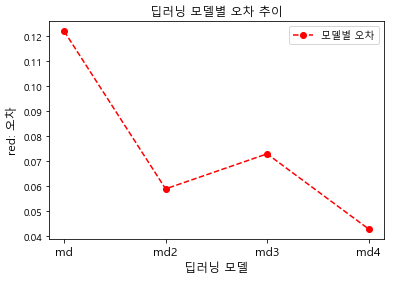

In [91]:
# 딥러닝 모델별 오차 추이

plt.plot(x_len, all_model_loss, 
         # 마커설정 옵션 'ro--'
         color = 'red', marker = 'o', linestyle = '--', 
         label = '모델별 오차')

plt.title('딥러닝 모델별 오차 추이')
plt.xlabel('딥러닝 모델', size = 12)
plt.xticks(x_len, ['md', 'md2', 'md3', 'md4'], size = 12)
plt.ylabel('red: 오차', size = 12)
plt.legend()

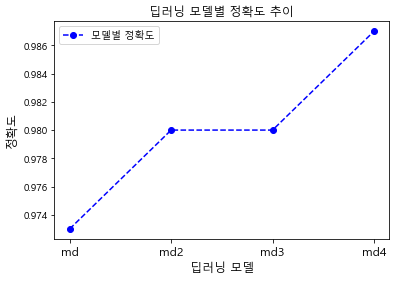

In [92]:
# 딥러닝 모델별 정확도 추이

plt.plot(x_len, all_model_acc, 
         # 마커설정 옵션 'bo--'
         color = 'blue', marker = 'o', linestyle = '--', 
         label = '모델별 정확도')

plt.title('딥러닝 모델별 정확도 추이')
plt.xlabel('딥러닝 모델', size = 12)
plt.xticks(x_len, ['md', 'md2', 'md3', 'md4'], size = 12)
plt.ylabel('정확도', size = 12)
plt.legend()

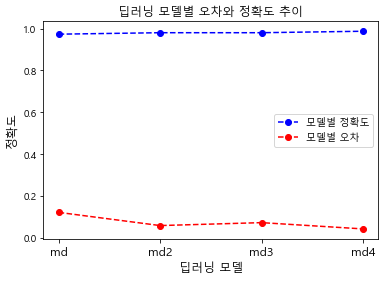

In [93]:
# 딥러닝 모델별 오차와 정확도 추이

plt.plot(x_len, all_model_acc, 'bo--', label = '모델별 정확도')
plt.plot(x_len, all_model_loss, 'ro--', label = '모델별 오차')
plt.title('딥러닝 모델별 오차와 정확도 추이')
plt.xlabel('딥러닝 모델', size = 12)
plt.xticks(x_len, ['md', 'md2', 'md3', 'md4'], size = 12)
plt.ylabel('정확도', size = 12)
plt.legend()

# 마커설정 옵션 'bo--', 'ro--'
# --> color = 'blue', marker = 'o', linestyle = '--' 의미임
# --> color = 'red', marker = 'o', linestyle = '--' 의미임

# <font color = 'blue'>피처셋 스케일링</font>
* 피처셋을 구성하는 개별 피처/입력/예측/독립 변수들의 수치를 0~1사이로 스케일링 필요
* 보통 딥러닝 신경망 기법에서는 피처데이터를 0~1사이로 스케일링 한 데이터인 경우 최적성능을 보임

#### (참고) 다양한 스케일링 기법: 자료의 분포를 평균 0, 분산 1 형태로 변경 
* scale(): 기본 스케일. 평균과 표준편차 사용
* robust_scale(): 중앙값(median)과 IQR(interquartile range) 사용. 아웃라이어의 영향을 최소화
* minmax_scale(): 최대/최소값이 각각 1, 0이 되도록 스케일링
* maxabs_scale(): 최대절대값과 0이 각각 1, 0이 되도록 스케일링

In [94]:
# sklearn 라이브러리의 스케일링 관련 메서트(함수) 로딩
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale

In [95]:
ex = [-7.0, -2.0, -1.0, 0, 1, 2, 3, 4, 5, 20]
ex

[-7.0, -2.0, -1.0, 0, 1, 2, 3, 4, 5, 20]

In [102]:
ex_scaled = pd.DataFrame({'ex':ex, 'scale(ex)':scale(ex), #'robust_scale(ex)':robust_scale(ex), 
                          'minmax_scale(ex)':minmax_scale(ex), 'maxabs_scale(ex)':maxabs_scale(ex)})
ex_scaled

,ex,maxabs_scale(ex),minmax_scale(ex),scale(ex)
0,-7.0,-0.35,0.000000,-1.421716
1,-2.0,-0.10,0.185185,-0.673444
2,-1.0,-0.05,0.222222,-0.523790
3,0.0,0.00,0.259259,-0.374136
4,1.0,0.05,0.296296,-0.224481
5,2.0,0.10,0.333333,-0.074827
6,3.0,0.15,0.370370,0.074827
7,4.0,0.20,0.407407,0.224481
8,5.0,0.25,0.444444,0.374136
9,20.0,1.00,1.000000,2.618951


### 피처셋 피처/입력/예측/독립변수 특성파악

In [103]:
# 간단 변수컬럼 조회
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [104]:
# 피처셋 정보확인
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


In [105]:
# 피처셋 기술통계분석
X.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


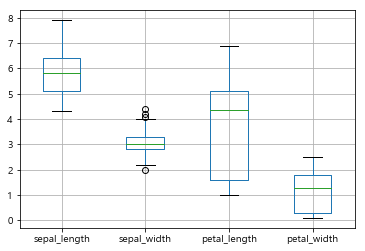

In [106]:
# 박스플롯을 이용한 피처셋 특성비교
X.boxplot()
# - 기본적인 데이터의 중심성, 변동성도 다르며,
#   아웃라이어도 일부 피처별로 특성을 보임

In [ ]:
# 밀도곡선을 이용한 피처셋 특성비교
X.plot.kde()
# - 특정피처의 데이터분포가 상당히 이질적임을 알 수 있음

#### 피처셋 스케일링
* sklearn라이브러리 preprocessing모듈의 스케일링 함수를 이용해 최대/최소값이 각각 1, 0이 되도록 스케일링

In [107]:
# sklearn 라이브러리의 스케일링관련 모듈로딩
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [109]:
# 표준정규화 스케일링
scaler = StandardScaler()
X_st = scaler.fit_transform(X) # fir_transform() : fit과 transform을 한번에 해주는 함수
X_st[0:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

In [110]:
# 표준정규화 스케일링 결과확인
X_st_df = pd.DataFrame(X_st, columns = ['sepal_length', 'sepal_width', 
                                        'petal_length', 'petal_width'])
X_st_df.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977


In [111]:
# 최대최소를 1과 0으로 하는 스케일링
scaler = MinMaxScaler()
X_mm = scaler.fit_transform(X)
X_mm[0:5]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667]])

In [112]:
# 최대최소를 1과 0으로 하는 스케일링 결과확인
X_mm_df = pd.DataFrame(X_mm, columns = ['sepal_length', 'sepal_width', 
                                        'petal_length', 'petal_width'])
X_mm_df.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667


In [113]:
# 이상치분포를 보정한 스케일링
scaler = RobustScaler()
X_rb = scaler.fit_transform(X)
X_rb[0:5]

array([[-0.53846154,  1.        , -0.84285714, -0.73333333],
       [-0.69230769,  0.        , -0.84285714, -0.73333333],
       [-0.84615385,  0.4       , -0.87142857, -0.73333333],
       [-0.92307692,  0.2       , -0.81428571, -0.73333333],
       [-0.61538462,  1.2       , -0.84285714, -0.73333333]])

In [114]:
# 이상치분포를 보정한 스케일링 결과확인
X_rb_df = pd.DataFrame(X_rb, columns = ['sepal_length', 'sepal_width', 
                                        'petal_length', 'petal_width'])
X_rb_df.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,-0.538462,1.0,-0.842857,-0.733333
1,-0.692308,0.0,-0.842857,-0.733333
2,-0.846154,0.4,-0.871429,-0.733333


C:\anaconda\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


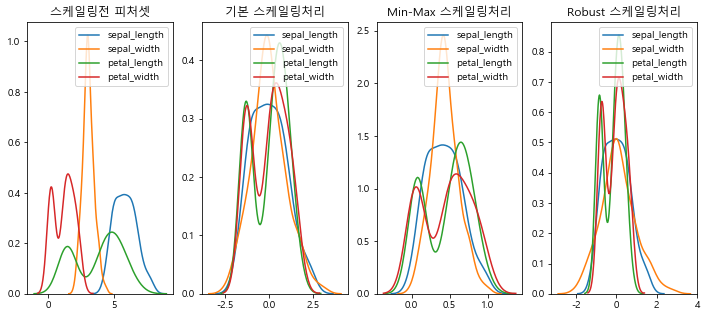

In [115]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize = (12, 5))

ax1.set_title('스케일링전 피처셋')
for i in X.columns:
    sns.kdeplot(X[i], ax=ax1)

ax2.set_title('기본 스케일링처리')
for i in X.columns:
    sns.kdeplot(X_st_df[i], ax=ax2)
    
ax3.set_title('Min-Max 스케일링처리')
for i in X.columns:
    sns.kdeplot(X_mm_df[i], ax=ax3)
    
ax4.set_title('Robust 스케일링처리')
for i in X.columns:
    sns.kdeplot(X_rb_df[i], ax=ax4)
    
# - Robust 스케일링처리 결과가 가장 피처셋의 분포를 전체적으로 통일시켜주었음 

In [117]:
# Robust 스케일링처리된 피처셋의 기술통계
X_rb_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,1.500000e+02,150.000000
mean,0.033333,0.108000,-1.689524e-01,-0.067556
std,0.636974,0.867189,5.041201e-01,0.508774
min,-1.153846,-2.000000,-9.571429e-01,-0.800000
25%,-0.538462,-0.400000,-7.857143e-01,-0.666667
50%,0.000000,0.000000,1.266348e-16,0.000000
75%,0.461538,0.600000,2.142857e-01,0.333333
max,1.615385,2.800000,7.285714e-01,0.800000


# <font color = 'blue'>딥러닝 모델링: Robust 스케일링 피처셋 이용</font>
* 기존 데이터셋: X, y_ohe
* 스케일링 데이터셋: X_rb_df, y_ohe

#### 딥러닝 모델계층 설정
* <font color = 'red'>md  모델</font>: 입력층(4개노드)-은닉층(16개노드)-출력층(3개노드)
* <font color = 'red'>md2 모델</font>: 입력층(4개노드)-은닉층(16개노드)-은닉층(24개노드)-출력층(3개노드)
* <font color = 'red'>md3 모델</font></font>: 입력층(4개노드)-은닉층(16개노드)-출력층(3개노드)
* <font color = 'red'>md4 모델</font>: 입력층(4개노드)-은닉층(16개노드)-은닉층(24개노드)-은닉층(12개노드)-출력층(3개노드)

#### 딥러닝 학습방법 설정
* 모든모델 동일: md.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

#### 딥러닝 모델에 데이터 피팅방법 설정
* md_rb.fit(X_rb_df, y, epochs = 200, batch_size = 10)
* md2_rb.fit(X_rb_df, y, epochs = 200, batch_size = 10)
* md3_rb.fit(X_rb_df, y, epochs = 1000, batch_size = 50)
* md4_rb.fit(X_rb_df, y, epochs = 2000, batch_size = 100)

### 딥러닝 라이브러리 로딩

In [118]:
# 딥러닝 관련 라이브러리
import tensorflow as tf
# - 딥러닝 학습알고리즘

from keras.models import Sequential
# - 딥러닝 학습계층을 순차적으로 쌓아올릴 수 있도록 해줌

from keras.layers import Dense
# - 딥러닝 학습계층별 노드/유닛을 밀집시켜 학습방법을 설정할 수 있도록 해줌

### 랜덤 시드넘버 설정

In [119]:
# 무작위 시드넘버 설정으로 샘플 재현성 확보
myseed = 0

import numpy as np
np.random.seed(myseed)
tf.set_random_seed(myseed)

In [120]:
# 딥러닝 학습계층 설정

# 기존모델
# - 입력층(4개노드)-은닉층(16개노드)-출력층(3개노드)
md_rb = Sequential()
md_rb.add(Dense(16, input_dim = 4, activation = 'relu'))
md_rb.add(Dense(3, activation = 'softmax'))

# 신규모델
# - 입력층(4개노드)-은닉층(16개노드)-은닉층(24개노드)-출력층(3개노드)
md2_rb = Sequential()
md2_rb.add(Dense(16, input_dim = 4, activation = 'relu'))
md2_rb.add(Dense(24, activation = 'relu'))
md2_rb.add(Dense(3, activation = 'softmax'))

# 기존모델
# - 입력층(4개노드)-은닉층(16개노드)-출력층(3개노드)
md3_rb = Sequential()
md3_rb.add(Dense(16, input_dim = 4, activation = 'relu'))
md3_rb.add(Dense(3, activation = 'softmax'))

# 신규모델
# - 입력층(4개노드)-은닉층(16개노드)-은닉층(24개노드)-은닉층(12개노드)-출력층(3개노드)
md4_rb = Sequential()
md4_rb.add(Dense(16, input_dim = 4, activation = 'relu'))
md4_rb.add(Dense(24, activation = 'relu'))
md4_rb.add(Dense(12, activation = 'relu'))
md4_rb.add(Dense(3, activation = 'softmax'))

### 모델 훈련방법 설정

In [121]:
# 준비된 학습계층의 학습방법 설정
md_rb.compile(loss = 'categorical_crossentropy', 
           optimizer = 'adam', metrics = ['accuracy'])

md2_rb.compile(loss = 'categorical_crossentropy', 
           optimizer = 'adam', metrics = ['accuracy'])

md3_rb.compile(loss = 'categorical_crossentropy', 
           optimizer = 'adam', metrics = ['accuracy'])

md4_rb.compile(loss = 'categorical_crossentropy', 
           optimizer = 'adam', metrics = ['accuracy'])

### 모델 훈련실시

In [122]:
# 딥러닝 모델 최적화 훈련진행

# 기존 피팅방법
md_rb.fit(X_rb_df, y_ohe, batch_size = 10, epochs = 200)

# 기존 피팅방법
md2_rb.fit(X_rb_df, y_ohe, batch_size = 10, epochs = 200)

# 수정된 피팅방법
md3_rb.fit(X_rb_df, y_ohe, batch_size = 50, epochs = 1000)

# 수정된 피팅방법
md4_rb.fit(X_rb_df, y_ohe, batch_size = 100, epochs = 2000)

Epoch 1/200
150/150 [==============================] - 1s 3ms/step - loss: 1.2280 - acc: 0.4667
Epoch 2/200
150/150 [==============================] - 0s 167us/step - loss: 1.1496 - acc: 0.4733
Epoch 3/200
150/150 [==============================] - 0s 167us/step - loss: 1.0763 - acc: 0.5200
Epoch 4/200
150/150 [==============================] - 0s 147us/step - loss: 1.0132 - acc: 0.5667
Epoch 5/200
150/150 [==============================] - 0s 220us/step - loss: 0.9569 - acc: 0.6400
Epoch 6/200
150/150 [==============================] - 0s 180us/step - loss: 0.9070 - acc: 0.6933
Epoch 7/200
150/150 [==============================] - 0s 167us/step - loss: 0.8585 - acc: 0.7400
Epoch 8/200
150/150 [==============================] - 0s 187us/step - loss: 0.8146 - acc: 0.7733
Epoch 9/200
150/150 [==============================] - 0s 180us/step - loss: 0.7689 - acc: 0.8067
Epoch 10/200
150/150 [==============================] - 0s 173us/step - loss: 0.7277 - acc: 0.8267
Epoch 11/200
150/150 

150/150 [==============================] - 0s 160us/step - loss: 0.1178 - acc: 0.9733
Epoch 84/200
150/150 [==============================] - 0s 160us/step - loss: 0.1164 - acc: 0.9733
Epoch 85/200
150/150 [==============================] - 0s 224us/step - loss: 0.1146 - acc: 0.9733
Epoch 86/200
150/150 [==============================] - 0s 173us/step - loss: 0.1129 - acc: 0.9733
Epoch 87/200
150/150 [==============================] - 0s 167us/step - loss: 0.1112 - acc: 0.9733
Epoch 88/200
150/150 [==============================] - 0s 160us/step - loss: 0.1097 - acc: 0.9733
Epoch 89/200
150/150 [==============================] - 0s 200us/step - loss: 0.1089 - acc: 0.9733
Epoch 90/200
150/150 [==============================] - 0s 180us/step - loss: 0.1069 - acc: 0.9733
Epoch 91/200
150/150 [==============================] - 0s 167us/step - loss: 0.1054 - acc: 0.9733
Epoch 92/200
150/150 [==============================] - 0s 220us/step - loss: 0.1042 - acc: 0.9733
Epoch 93/200
150/150 [=

150/150 [==============================] - 0s 173us/step - loss: 0.0606 - acc: 0.9800
Epoch 165/200
150/150 [==============================] - 0s 167us/step - loss: 0.0599 - acc: 0.9800
Epoch 166/200
150/150 [==============================] - 0s 167us/step - loss: 0.0600 - acc: 0.9800
Epoch 167/200
150/150 [==============================] - 0s 187us/step - loss: 0.0594 - acc: 0.9800
Epoch 168/200
150/150 [==============================] - 0s 173us/step - loss: 0.0592 - acc: 0.9800
Epoch 169/200
150/150 [==============================] - 0s 173us/step - loss: 0.0593 - acc: 0.9800
Epoch 170/200
150/150 [==============================] - 0s 153us/step - loss: 0.0587 - acc: 0.9800
Epoch 171/200
150/150 [==============================] - 0s 207us/step - loss: 0.0585 - acc: 0.9800
Epoch 172/200
150/150 [==============================] - 0s 200us/step - loss: 0.0582 - acc: 0.9800
Epoch 173/200
150/150 [==============================] - 0s 167us/step - loss: 0.0579 - acc: 0.9800
Epoch 174/200


150/150 [==============================] - 0s 184us/step - loss: 0.1031 - acc: 0.9667
Epoch 47/200
150/150 [==============================] - 0s 167us/step - loss: 0.0988 - acc: 0.9733
Epoch 48/200
150/150 [==============================] - 0s 200us/step - loss: 0.0947 - acc: 0.9733
Epoch 49/200
150/150 [==============================] - 0s 227us/step - loss: 0.0920 - acc: 0.9733
Epoch 50/200
150/150 [==============================] - 0s 184us/step - loss: 0.0888 - acc: 0.9733
Epoch 51/200
150/150 [==============================] - 0s 173us/step - loss: 0.0866 - acc: 0.9800
Epoch 52/200
150/150 [==============================] - 0s 173us/step - loss: 0.0827 - acc: 0.9800
Epoch 53/200
150/150 [==============================] - 0s 234us/step - loss: 0.0804 - acc: 0.9867
Epoch 54/200
150/150 [==============================] - 0s 187us/step - loss: 0.0782 - acc: 0.9733
Epoch 55/200
150/150 [==============================] - 0s 180us/step - loss: 0.0770 - acc: 0.9867
Epoch 56/200
150/150 [=

150/150 [==============================] - 0s 167us/step - loss: 0.0390 - acc: 0.9867
Epoch 129/200
150/150 [==============================] - 0s 187us/step - loss: 0.0378 - acc: 0.9867
Epoch 130/200
150/150 [==============================] - 0s 173us/step - loss: 0.0389 - acc: 0.9867
Epoch 131/200
150/150 [==============================] - 0s 193us/step - loss: 0.0388 - acc: 0.9867
Epoch 132/200
150/150 [==============================] - 0s 173us/step - loss: 0.0395 - acc: 0.9867
Epoch 133/200
150/150 [==============================] - 0s 173us/step - loss: 0.0383 - acc: 0.9867
Epoch 134/200
150/150 [==============================] - 0s 180us/step - loss: 0.0388 - acc: 0.9867
Epoch 135/200
150/150 [==============================] - 0s 173us/step - loss: 0.0381 - acc: 0.9867
Epoch 136/200
150/150 [==============================] - 0s 160us/step - loss: 0.0375 - acc: 0.9867
Epoch 137/200
150/150 [==============================] - 0s 180us/step - loss: 0.0381 - acc: 0.9867
Epoch 138/200


150/150 [==============================] - 0s 53us/step - loss: 1.0407 - acc: 0.5067
Epoch 11/1000
150/150 [==============================] - 0s 53us/step - loss: 1.0291 - acc: 0.5267
Epoch 12/1000
150/150 [==============================] - 0s 53us/step - loss: 1.0163 - acc: 0.5467
Epoch 13/1000
150/150 [==============================] - 0s 53us/step - loss: 1.0046 - acc: 0.5467
Epoch 14/1000
150/150 [==============================] - 0s 47us/step - loss: 0.9922 - acc: 0.5733
Epoch 15/1000
150/150 [==============================] - 0s 53us/step - loss: 0.9811 - acc: 0.5933
Epoch 16/1000
150/150 [==============================] - 0s 53us/step - loss: 0.9694 - acc: 0.6133
Epoch 17/1000
150/150 [==============================] - 0s 53us/step - loss: 0.9584 - acc: 0.6333
Epoch 18/1000
150/150 [==============================] - 0s 53us/step - loss: 0.9477 - acc: 0.6667
Epoch 19/1000
150/150 [==============================] - 0s 47us/step - loss: 0.9370 - acc: 0.6867
Epoch 20/1000
150/150 [=

150/150 [==============================] - 0s 80us/step - loss: 0.4353 - acc: 0.8533
Epoch 93/1000
150/150 [==============================] - 0s 80us/step - loss: 0.4319 - acc: 0.8533
Epoch 94/1000
150/150 [==============================] - 0s 80us/step - loss: 0.4286 - acc: 0.8533
Epoch 95/1000
150/150 [==============================] - 0s 67us/step - loss: 0.4255 - acc: 0.8533
Epoch 96/1000
150/150 [==============================] - 0s 73us/step - loss: 0.4223 - acc: 0.8533
Epoch 97/1000
150/150 [==============================] - 0s 67us/step - loss: 0.4191 - acc: 0.8533
Epoch 98/1000
150/150 [==============================] - 0s 60us/step - loss: 0.4162 - acc: 0.8533
Epoch 99/1000
150/150 [==============================] - 0s 67us/step - loss: 0.4131 - acc: 0.8600
Epoch 100/1000
150/150 [==============================] - 0s 67us/step - loss: 0.4101 - acc: 0.8600
Epoch 101/1000
150/150 [==============================] - 0s 53us/step - loss: 0.4071 - acc: 0.8667
Epoch 102/1000
150/150

150/150 [==============================] - 0s 87us/step - loss: 0.2488 - acc: 0.9333
Epoch 173/1000
150/150 [==============================] - ETA: 0s - loss: 0.2583 - acc: 0.940 - 0s 67us/step - loss: 0.2472 - acc: 0.9333
Epoch 174/1000
150/150 [==============================] - 0s 67us/step - loss: 0.2454 - acc: 0.9333
Epoch 175/1000
150/150 [==============================] - 0s 67us/step - loss: 0.2438 - acc: 0.9400
Epoch 176/1000
150/150 [==============================] - 0s 73us/step - loss: 0.2421 - acc: 0.9400
Epoch 177/1000
150/150 [==============================] - 0s 73us/step - loss: 0.2404 - acc: 0.9400
Epoch 178/1000
150/150 [==============================] - 0s 73us/step - loss: 0.2388 - acc: 0.9400
Epoch 179/1000
150/150 [==============================] - ETA: 0s - loss: 0.2705 - acc: 0.920 - 0s 73us/step - loss: 0.2372 - acc: 0.9467
Epoch 180/1000
150/150 [==============================] - 0s 80us/step - loss: 0.2355 - acc: 0.9467
Epoch 181/1000
150/150 [===============

150/150 [==============================] - 0s 60us/step - loss: 0.1475 - acc: 0.9800
Epoch 253/1000
150/150 [==============================] - 0s 60us/step - loss: 0.1466 - acc: 0.9800
Epoch 254/1000
150/150 [==============================] - 0s 60us/step - loss: 0.1457 - acc: 0.9800
Epoch 255/1000
150/150 [==============================] - 0s 67us/step - loss: 0.1449 - acc: 0.9800
Epoch 256/1000
150/150 [==============================] - 0s 73us/step - loss: 0.1441 - acc: 0.9800
Epoch 257/1000
150/150 [==============================] - 0s 67us/step - loss: 0.1433 - acc: 0.9800
Epoch 258/1000
150/150 [==============================] - 0s 60us/step - loss: 0.1424 - acc: 0.9733
Epoch 259/1000
150/150 [==============================] - 0s 60us/step - loss: 0.1416 - acc: 0.9733
Epoch 260/1000
150/150 [==============================] - 0s 67us/step - loss: 0.1408 - acc: 0.9733
Epoch 261/1000
150/150 [==============================] - 0s 53us/step - loss: 0.1400 - acc: 0.9733
Epoch 262/1000


150/150 [==============================] - 0s 67us/step - loss: 0.1007 - acc: 0.9800
Epoch 332/1000
150/150 [==============================] - 0s 60us/step - loss: 0.1003 - acc: 0.9800
Epoch 333/1000
150/150 [==============================] - 0s 93us/step - loss: 0.0999 - acc: 0.9800
Epoch 334/1000
150/150 [==============================] - 0s 73us/step - loss: 0.0996 - acc: 0.9800
Epoch 335/1000
150/150 [==============================] - 0s 67us/step - loss: 0.0992 - acc: 0.9800
Epoch 336/1000
150/150 [==============================] - 0s 73us/step - loss: 0.0988 - acc: 0.9800
Epoch 337/1000
150/150 [==============================] - 0s 60us/step - loss: 0.0984 - acc: 0.9800
Epoch 338/1000
150/150 [==============================] - 0s 67us/step - loss: 0.0981 - acc: 0.9800
Epoch 339/1000
150/150 [==============================] - 0s 87us/step - loss: 0.0977 - acc: 0.9800
Epoch 340/1000
150/150 [==============================] - 0s 60us/step - loss: 0.0974 - acc: 0.9800
Epoch 341/1000


150/150 [==============================] - 0s 73us/step - loss: 0.0783 - acc: 0.9800
Epoch 413/1000
150/150 [==============================] - 0s 73us/step - loss: 0.0781 - acc: 0.9800
Epoch 414/1000
150/150 [==============================] - 0s 113us/step - loss: 0.0779 - acc: 0.9800
Epoch 415/1000
150/150 [==============================] - 0s 60us/step - loss: 0.0777 - acc: 0.9800
Epoch 416/1000
150/150 [==============================] - 0s 100us/step - loss: 0.0776 - acc: 0.9800
Epoch 417/1000
150/150 [==============================] - 0s 57us/step - loss: 0.0774 - acc: 0.9800
Epoch 418/1000
150/150 [==============================] - 0s 67us/step - loss: 0.0772 - acc: 0.9800
Epoch 419/1000
150/150 [==============================] - 0s 67us/step - loss: 0.0770 - acc: 0.9800
Epoch 420/1000
150/150 [==============================] - 0s 87us/step - loss: 0.0768 - acc: 0.9800
Epoch 421/1000
150/150 [==============================] - 0s 93us/step - loss: 0.0767 - acc: 0.9800
Epoch 422/100

150/150 [==============================] - 0s 53us/step - loss: 0.0662 - acc: 0.9800
Epoch 493/1000
150/150 [==============================] - 0s 53us/step - loss: 0.0661 - acc: 0.9800
Epoch 494/1000
150/150 [==============================] - 0s 53us/step - loss: 0.0661 - acc: 0.9800
Epoch 495/1000
150/150 [==============================] - 0s 57us/step - loss: 0.0659 - acc: 0.9800
Epoch 496/1000
150/150 [==============================] - 0s 50us/step - loss: 0.0658 - acc: 0.9800
Epoch 497/1000
150/150 [==============================] - 0s 60us/step - loss: 0.0657 - acc: 0.9800
Epoch 498/1000
150/150 [==============================] - 0s 47us/step - loss: 0.0656 - acc: 0.9800
Epoch 499/1000
150/150 [==============================] - 0s 60us/step - loss: 0.0655 - acc: 0.9800
Epoch 500/1000
150/150 [==============================] - 0s 60us/step - loss: 0.0653 - acc: 0.9800
Epoch 501/1000
150/150 [==============================] - 0s 60us/step - loss: 0.0652 - acc: 0.9800
Epoch 502/1000


150/150 [==============================] - 0s 67us/step - loss: 0.0588 - acc: 0.9867
Epoch 573/1000
150/150 [==============================] - 0s 60us/step - loss: 0.0587 - acc: 0.9867
Epoch 574/1000
150/150 [==============================] - 0s 53us/step - loss: 0.0586 - acc: 0.9867
Epoch 575/1000
150/150 [==============================] - 0s 53us/step - loss: 0.0585 - acc: 0.9867
Epoch 576/1000
150/150 [==============================] - 0s 60us/step - loss: 0.0585 - acc: 0.9867
Epoch 577/1000
150/150 [==============================] - 0s 60us/step - loss: 0.0584 - acc: 0.9867
Epoch 578/1000
150/150 [==============================] - ETA: 0s - loss: 0.0636 - acc: 0.980 - 0s 60us/step - loss: 0.0583 - acc: 0.9867
Epoch 579/1000
150/150 [==============================] - 0s 63us/step - loss: 0.0582 - acc: 0.9867
Epoch 580/1000
150/150 [==============================] - 0s 60us/step - loss: 0.0582 - acc: 0.9867
Epoch 581/1000
150/150 [==============================] - 0s 60us/step - loss

150/150 [==============================] - 0s 93us/step - loss: 0.0537 - acc: 0.9867
Epoch 653/1000
150/150 [==============================] - 0s 87us/step - loss: 0.0536 - acc: 0.9867
Epoch 654/1000
150/150 [==============================] - 0s 80us/step - loss: 0.0536 - acc: 0.9867
Epoch 655/1000
150/150 [==============================] - 0s 73us/step - loss: 0.0535 - acc: 0.9867
Epoch 656/1000
150/150 [==============================] - 0s 70us/step - loss: 0.0535 - acc: 0.9867
Epoch 657/1000
150/150 [==============================] - 0s 73us/step - loss: 0.0534 - acc: 0.9867
Epoch 658/1000
150/150 [==============================] - 0s 73us/step - loss: 0.0533 - acc: 0.9867
Epoch 659/1000
150/150 [==============================] - 0s 67us/step - loss: 0.0533 - acc: 0.9867
Epoch 660/1000
150/150 [==============================] - 0s 80us/step - loss: 0.0532 - acc: 0.9867
Epoch 661/1000
150/150 [==============================] - 0s 73us/step - loss: 0.0532 - acc: 0.9867
Epoch 662/1000


150/150 [==============================] - 0s 60us/step - loss: 0.0499 - acc: 0.9867
Epoch 735/1000
150/150 [==============================] - 0s 60us/step - loss: 0.0499 - acc: 0.9867
Epoch 736/1000
150/150 [==============================] - 0s 63us/step - loss: 0.0498 - acc: 0.9867
Epoch 737/1000
150/150 [==============================] - 0s 73us/step - loss: 0.0498 - acc: 0.9867
Epoch 738/1000
150/150 [==============================] - 0s 87us/step - loss: 0.0498 - acc: 0.9867
Epoch 739/1000
150/150 [==============================] - 0s 80us/step - loss: 0.0497 - acc: 0.9867
Epoch 740/1000
150/150 [==============================] - 0s 73us/step - loss: 0.0497 - acc: 0.9867
Epoch 741/1000
150/150 [==============================] - 0s 67us/step - loss: 0.0497 - acc: 0.9867
Epoch 742/1000
150/150 [==============================] - 0s 60us/step - loss: 0.0497 - acc: 0.9867
Epoch 743/1000
150/150 [==============================] - 0s 67us/step - loss: 0.0496 - acc: 0.9867
Epoch 744/1000


150/150 [==============================] - 0s 67us/step - loss: 0.0471 - acc: 0.9867
Epoch 816/1000
150/150 [==============================] - 0s 67us/step - loss: 0.0471 - acc: 0.9867
Epoch 817/1000
150/150 [==============================] - 0s 67us/step - loss: 0.0471 - acc: 0.9867
Epoch 818/1000
150/150 [==============================] - 0s 67us/step - loss: 0.0470 - acc: 0.9867
Epoch 819/1000
150/150 [==============================] - 0s 53us/step - loss: 0.0470 - acc: 0.9867
Epoch 820/1000
150/150 [==============================] - ETA: 0s - loss: 0.0757 - acc: 0.980 - 0s 80us/step - loss: 0.0470 - acc: 0.9867
Epoch 821/1000
150/150 [==============================] - 0s 60us/step - loss: 0.0469 - acc: 0.9867
Epoch 822/1000
150/150 [==============================] - 0s 60us/step - loss: 0.0469 - acc: 0.9867
Epoch 823/1000
150/150 [==============================] - 0s 53us/step - loss: 0.0468 - acc: 0.9867
Epoch 824/1000
150/150 [==============================] - 0s 60us/step - loss

150/150 [==============================] - 0s 53us/step - loss: 0.0448 - acc: 0.9867
Epoch 896/1000
150/150 [==============================] - 0s 80us/step - loss: 0.0449 - acc: 0.9867
Epoch 897/1000
150/150 [==============================] - ETA: 0s - loss: 0.0667 - acc: 0.980 - 0s 60us/step - loss: 0.0448 - acc: 0.9867
Epoch 898/1000
150/150 [==============================] - 0s 60us/step - loss: 0.0449 - acc: 0.9867
Epoch 899/1000
150/150 [==============================] - 0s 67us/step - loss: 0.0448 - acc: 0.9867
Epoch 900/1000
150/150 [==============================] - 0s 60us/step - loss: 0.0448 - acc: 0.9867
Epoch 901/1000
150/150 [==============================] - 0s 53us/step - loss: 0.0447 - acc: 0.9867
Epoch 902/1000
150/150 [==============================] - 0s 60us/step - loss: 0.0447 - acc: 0.9867
Epoch 903/1000
150/150 [==============================] - 0s 67us/step - loss: 0.0446 - acc: 0.9867
Epoch 904/1000
150/150 [==============================] - 0s 67us/step - loss

150/150 [==============================] - 0s 53us/step - loss: 0.0430 - acc: 0.9867
Epoch 976/1000
150/150 [==============================] - 0s 60us/step - loss: 0.0429 - acc: 0.9867
Epoch 977/1000
150/150 [==============================] - 0s 67us/step - loss: 0.0430 - acc: 0.9867
Epoch 978/1000
150/150 [==============================] - ETA: 0s - loss: 0.0480 - acc: 0.980 - 0s 53us/step - loss: 0.0429 - acc: 0.9867
Epoch 979/1000
150/150 [==============================] - 0s 60us/step - loss: 0.0430 - acc: 0.9867
Epoch 980/1000
150/150 [==============================] - 0s 67us/step - loss: 0.0429 - acc: 0.9867
Epoch 981/1000
150/150 [==============================] - 0s 67us/step - loss: 0.0429 - acc: 0.9867
Epoch 982/1000
150/150 [==============================] - 0s 53us/step - loss: 0.0429 - acc: 0.9867
Epoch 983/1000
150/150 [==============================] - 0s 60us/step - loss: 0.0430 - acc: 0.9867
Epoch 984/1000
150/150 [==============================] - 0s 60us/step - loss

150/150 [==============================] - 0s 53us/step - loss: 0.2977 - acc: 0.9267
Epoch 58/2000
150/150 [==============================] - 0s 47us/step - loss: 0.2908 - acc: 0.9267
Epoch 59/2000
150/150 [==============================] - 0s 63us/step - loss: 0.2843 - acc: 0.9333
Epoch 60/2000
150/150 [==============================] - ETA: 0s - loss: 0.2885 - acc: 0.930 - 0s 47us/step - loss: 0.2779 - acc: 0.9333
Epoch 61/2000
150/150 [==============================] - 0s 47us/step - loss: 0.2712 - acc: 0.9333
Epoch 62/2000
150/150 [==============================] - 0s 47us/step - loss: 0.2650 - acc: 0.9267
Epoch 63/2000
150/150 [==============================] - 0s 47us/step - loss: 0.2588 - acc: 0.9400
Epoch 64/2000
150/150 [==============================] - 0s 47us/step - loss: 0.2530 - acc: 0.9400
Epoch 65/2000
150/150 [==============================] - ETA: 0s - loss: 0.2567 - acc: 0.940 - 0s 53us/step - loss: 0.2472 - acc: 0.9400
Epoch 66/2000
150/150 [========================

150/150 [==============================] - 0s 47us/step - loss: 0.0733 - acc: 0.9733
Epoch 139/2000
150/150 [==============================] - 0s 50us/step - loss: 0.0725 - acc: 0.9733
Epoch 140/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0718 - acc: 0.9733
Epoch 141/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0710 - acc: 0.9733
Epoch 142/2000
150/150 [==============================] - 0s 60us/step - loss: 0.0703 - acc: 0.9800
Epoch 143/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0701 - acc: 0.9733
Epoch 144/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0697 - acc: 0.9733
Epoch 145/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0692 - acc: 0.9733
Epoch 146/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0685 - acc: 0.9733
Epoch 147/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0677 - acc: 0.9800
Epoch 148/2000


150/150 [==============================] - 0s 47us/step - loss: 0.0443 - acc: 0.9867
Epoch 220/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0440 - acc: 0.9867
Epoch 221/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0438 - acc: 0.9867
Epoch 222/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0437 - acc: 0.9867
Epoch 223/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0436 - acc: 0.9867
Epoch 224/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0434 - acc: 0.9867
Epoch 225/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0432 - acc: 0.9867
Epoch 226/2000
150/150 [==============================] - 0s 113us/step - loss: 0.0433 - acc: 0.9867
Epoch 227/2000
150/150 [==============================] - ETA: 0s - loss: 0.0528 - acc: 0.980 - 0s 53us/step - loss: 0.0429 - acc: 0.9867
Epoch 228/2000
150/150 [==============================] - 0s 53us/step - los

150/150 [==============================] - 0s 60us/step - loss: 0.0351 - acc: 0.9867
Epoch 299/2000
150/150 [==============================] - 0s 60us/step - loss: 0.0351 - acc: 0.9867
Epoch 300/2000
150/150 [==============================] - 0s 67us/step - loss: 0.0350 - acc: 0.9867
Epoch 301/2000
150/150 [==============================] - 0s 60us/step - loss: 0.0350 - acc: 0.9867
Epoch 302/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0349 - acc: 0.9867
Epoch 303/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0348 - acc: 0.9867
Epoch 304/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0348 - acc: 0.9867
Epoch 305/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0347 - acc: 0.9867
Epoch 306/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0348 - acc: 0.9867
Epoch 307/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0345 - acc: 0.9867
Epoch 308/2000


150/150 [==============================] - 0s 53us/step - loss: 0.0300 - acc: 0.9867
Epoch 379/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0299 - acc: 0.9867
Epoch 380/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0299 - acc: 0.9867
Epoch 381/2000
150/150 [==============================] - 0s 60us/step - loss: 0.0298 - acc: 0.9867
Epoch 382/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0297 - acc: 0.9867
Epoch 383/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0300 - acc: 0.9867
Epoch 384/2000
150/150 [==============================] - 0s 73us/step - loss: 0.0299 - acc: 0.9867
Epoch 385/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0295 - acc: 0.9867
Epoch 386/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0294 - acc: 0.9867
Epoch 387/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0294 - acc: 0.9867
Epoch 388/2000


150/150 [==============================] - 0s 47us/step - loss: 0.0251 - acc: 0.9867
Epoch 459/2000
150/150 [==============================] - ETA: 0s - loss: 0.0329 - acc: 0.980 - 0s 47us/step - loss: 0.0254 - acc: 0.9867
Epoch 460/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0252 - acc: 0.9867
Epoch 461/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0250 - acc: 0.9867
Epoch 462/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0251 - acc: 0.9867
Epoch 463/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0252 - acc: 0.9867
Epoch 464/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0251 - acc: 0.9867
Epoch 465/2000
150/150 [==============================] - 0s 60us/step - loss: 0.0249 - acc: 0.9867
Epoch 466/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0246 - acc: 0.9867
Epoch 467/2000
150/150 [==============================] - 0s 53us/step - loss

150/150 [==============================] - 0s 60us/step - loss: 0.0201 - acc: 0.9933
Epoch 539/2000
150/150 [==============================] - 0s 60us/step - loss: 0.0201 - acc: 0.9933
Epoch 540/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0204 - acc: 0.9933
Epoch 541/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0199 - acc: 0.9933
Epoch 542/2000
150/150 [==============================] - ETA: 0s - loss: 0.0241 - acc: 0.990 - 0s 47us/step - loss: 0.0200 - acc: 0.9933
Epoch 543/2000
150/150 [==============================] - ETA: 0s - loss: 0.0260 - acc: 0.980 - 0s 47us/step - loss: 0.0200 - acc: 0.9867
Epoch 544/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0199 - acc: 0.9867
Epoch 545/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0197 - acc: 0.9867
Epoch 546/2000
150/150 [==============================] - 0s 60us/step - loss: 0.0199 - acc: 0.9933
Epoch 547/2000
150/150 [===============

150/150 [==============================] - 0s 60us/step - loss: 0.0154 - acc: 0.9933
Epoch 618/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0152 - acc: 0.9933
Epoch 619/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0149 - acc: 0.9933
Epoch 620/2000
150/150 [==============================] - ETA: 0s - loss: 0.0177 - acc: 0.990 - 0s 47us/step - loss: 0.0150 - acc: 0.9933
Epoch 621/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0150 - acc: 0.9933
Epoch 622/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0148 - acc: 0.9933
Epoch 623/2000
150/150 [==============================] - 0s 60us/step - loss: 0.0147 - acc: 0.9933
Epoch 624/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0148 - acc: 0.9933
Epoch 625/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0146 - acc: 0.9933
Epoch 626/2000
150/150 [==============================] - 0s 60us/step - loss

150/150 [==============================] - 0s 63us/step - loss: 0.0104 - acc: 0.9933
Epoch 699/2000
150/150 [==============================] - 0s 73us/step - loss: 0.0103 - acc: 0.9933
Epoch 700/2000
150/150 [==============================] - 0s 67us/step - loss: 0.0102 - acc: 1.0000
Epoch 701/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0101 - acc: 1.0000
Epoch 702/2000
150/150 [==============================] - 0s 60us/step - loss: 0.0101 - acc: 1.0000
Epoch 703/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0100 - acc: 1.0000
Epoch 704/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0100 - acc: 1.0000
Epoch 705/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0099 - acc: 1.0000
Epoch 706/2000
150/150 [==============================] - 0s 60us/step - loss: 0.0098 - acc: 1.0000
Epoch 707/2000
150/150 [==============================] - ETA: 0s - loss: 0.0060 - acc: 1.000 - 0s 60us/step - loss

150/150 [==============================] - 0s 53us/step - loss: 0.0067 - acc: 1.0000
Epoch 779/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0067 - acc: 1.0000
Epoch 780/2000
150/150 [==============================] - 0s 50us/step - loss: 0.0067 - acc: 1.0000
Epoch 781/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0067 - acc: 1.0000
Epoch 782/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0066 - acc: 1.0000
Epoch 783/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0065 - acc: 1.0000
Epoch 784/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0065 - acc: 1.0000
Epoch 785/2000
150/150 [==============================] - 0s 60us/step - loss: 0.0065 - acc: 1.0000
Epoch 786/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0065 - acc: 1.0000
Epoch 787/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0064 - acc: 1.0000
Epoch 788/2000


150/150 [==============================] - 0s 53us/step - loss: 0.0044 - acc: 1.0000
Epoch 859/2000
150/150 [==============================] - 0s 60us/step - loss: 0.0043 - acc: 1.0000
Epoch 860/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0043 - acc: 1.0000
Epoch 861/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0044 - acc: 1.0000
Epoch 862/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0044 - acc: 1.0000
Epoch 863/2000
150/150 [==============================] - 0s 50us/step - loss: 0.0044 - acc: 1.0000
Epoch 864/2000
150/150 [==============================] - 0s 40us/step - loss: 0.0044 - acc: 1.0000
Epoch 865/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0044 - acc: 1.0000
Epoch 866/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0043 - acc: 1.0000
Epoch 867/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0042 - acc: 1.0000
Epoch 868/2000


150/150 [==============================] - 0s 60us/step - loss: 0.0030 - acc: 1.0000
Epoch 940/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0030 - acc: 1.0000
Epoch 941/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0030 - acc: 1.0000
Epoch 942/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0030 - acc: 1.0000
Epoch 943/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0029 - acc: 1.0000
Epoch 944/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0029 - acc: 1.0000
Epoch 945/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0029 - acc: 1.0000
Epoch 946/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0029 - acc: 1.0000
Epoch 947/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0029 - acc: 1.0000
Epoch 948/2000
150/150 [==============================] - 0s 57us/step - loss: 0.0029 - acc: 1.0000
Epoch 949/2000


150/150 [==============================] - 0s 53us/step - loss: 0.0021 - acc: 1.0000
Epoch 1019/2000
150/150 [==============================] - 0s 60us/step - loss: 0.0021 - acc: 1.0000
Epoch 1020/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0021 - acc: 1.0000
Epoch 1021/2000
150/150 [==============================] - 0s 60us/step - loss: 0.0021 - acc: 1.0000
Epoch 1022/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0021 - acc: 1.0000
Epoch 1023/2000
150/150 [==============================] - 0s 47us/step - loss: 0.0021 - acc: 1.0000
Epoch 1024/2000
150/150 [==============================] - 0s 60us/step - loss: 0.0020 - acc: 1.0000
Epoch 1025/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0021 - acc: 1.0000
Epoch 1026/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0021 - acc: 1.0000
Epoch 1027/2000
150/150 [==============================] - 0s 60us/step - loss: 0.0020 - acc: 1.0000
Epoch 

150/150 [==============================] - 0s 53us/step - loss: 0.0015 - acc: 1.0000
Epoch 1099/2000
150/150 [==============================] - 0s 60us/step - loss: 0.0015 - acc: 1.0000
Epoch 1100/2000
150/150 [==============================] - 0s 60us/step - loss: 0.0015 - acc: 1.0000
Epoch 1101/2000
150/150 [==============================] - 0s 60us/step - loss: 0.0015 - acc: 1.0000
Epoch 1102/2000
150/150 [==============================] - 0s 60us/step - loss: 0.0015 - acc: 1.0000
Epoch 1103/2000
150/150 [==============================] - 0s 60us/step - loss: 0.0015 - acc: 1.0000
Epoch 1104/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0015 - acc: 1.0000
Epoch 1105/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0015 - acc: 1.0000
Epoch 1106/2000
150/150 [==============================] - 0s 67us/step - loss: 0.0015 - acc: 1.0000
Epoch 1107/2000
150/150 [==============================] - 0s 60us/step - loss: 0.0015 - acc: 1.0000
Epoch 

150/150 [==============================] - 0s 60us/step - loss: 0.0011 - acc: 1.0000
Epoch 1179/2000
150/150 [==============================] - 0s 60us/step - loss: 0.0011 - acc: 1.0000
Epoch 1180/2000
150/150 [==============================] - 0s 60us/step - loss: 0.0011 - acc: 1.0000
Epoch 1181/2000
150/150 [==============================] - 0s 60us/step - loss: 0.0011 - acc: 1.0000
Epoch 1182/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0011 - acc: 1.0000
Epoch 1183/2000
150/150 [==============================] - 0s 67us/step - loss: 0.0011 - acc: 1.0000
Epoch 1184/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0011 - acc: 1.0000
Epoch 1185/2000
150/150 [==============================] - 0s 73us/step - loss: 0.0011 - acc: 1.0000
Epoch 1186/2000
150/150 [==============================] - 0s 60us/step - loss: 0.0011 - acc: 1.0000
Epoch 1187/2000
150/150 [==============================] - 0s 53us/step - loss: 0.0011 - acc: 1.0000
Epoch 

150/150 [==============================] - 0s 53us/step - loss: 8.6878e-04 - acc: 1.0000
Epoch 1257/2000
150/150 [==============================] - 0s 67us/step - loss: 8.6216e-04 - acc: 1.0000
Epoch 1258/2000
150/150 [==============================] - 0s 53us/step - loss: 8.5460e-04 - acc: 1.0000
Epoch 1259/2000
150/150 [==============================] - 0s 67us/step - loss: 8.5245e-04 - acc: 1.0000
Epoch 1260/2000
150/150 [==============================] - 0s 60us/step - loss: 8.5323e-04 - acc: 1.0000
Epoch 1261/2000
150/150 [==============================] - 0s 60us/step - loss: 8.6741e-04 - acc: 1.0000
Epoch 1262/2000
150/150 [==============================] - 0s 60us/step - loss: 8.4909e-04 - acc: 1.0000
Epoch 1263/2000
150/150 [==============================] - 0s 53us/step - loss: 8.4431e-04 - acc: 1.0000
Epoch 1264/2000
150/150 [==============================] - 0s 60us/step - loss: 8.4336e-04 - acc: 1.0000
Epoch 1265/2000
150/150 [==============================] - 0s 53us/step

150/150 [==============================] - 0s 53us/step - loss: 6.7541e-04 - acc: 1.0000
Epoch 1334/2000
150/150 [==============================] - 0s 53us/step - loss: 6.7572e-04 - acc: 1.0000
Epoch 1335/2000
150/150 [==============================] - 0s 53us/step - loss: 6.7272e-04 - acc: 1.0000
Epoch 1336/2000
150/150 [==============================] - 0s 53us/step - loss: 6.6934e-04 - acc: 1.0000
Epoch 1337/2000
150/150 [==============================] - 0s 60us/step - loss: 6.6738e-04 - acc: 1.0000
Epoch 1338/2000
150/150 [==============================] - 0s 67us/step - loss: 6.6490e-04 - acc: 1.0000
Epoch 1339/2000
150/150 [==============================] - 0s 60us/step - loss: 6.6702e-04 - acc: 1.0000
Epoch 1340/2000
150/150 [==============================] - 0s 73us/step - loss: 6.5991e-04 - acc: 1.0000
Epoch 1341/2000
150/150 [==============================] - 0s 53us/step - loss: 6.6023e-04 - acc: 1.0000
Epoch 1342/2000
150/150 [==============================] - 0s 60us/step

Epoch 1410/2000
150/150 [==============================] - 0s 67us/step - loss: 5.4245e-04 - acc: 1.0000
Epoch 1411/2000
150/150 [==============================] - 0s 53us/step - loss: 5.3961e-04 - acc: 1.0000
Epoch 1412/2000
150/150 [==============================] - ETA: 0s - loss: 1.9500e-04 - acc: 1.000 - 0s 107us/step - loss: 5.3862e-04 - acc: 1.0000
Epoch 1413/2000
150/150 [==============================] - 0s 60us/step - loss: 5.3654e-04 - acc: 1.0000
Epoch 1414/2000
150/150 [==============================] - 0s 47us/step - loss: 5.3505e-04 - acc: 1.0000
Epoch 1415/2000
150/150 [==============================] - 0s 80us/step - loss: 5.3308e-04 - acc: 1.0000
Epoch 1416/2000
150/150 [==============================] - 0s 53us/step - loss: 5.3182e-04 - acc: 1.0000
Epoch 1417/2000
150/150 [==============================] - 0s 53us/step - loss: 5.3024e-04 - acc: 1.0000
Epoch 1418/2000
150/150 [==============================] - 0s 60us/step - loss: 5.3054e-04 - acc: 1.0000
Epoch 1419/2

150/150 [==============================] - 0s 60us/step - loss: 4.4331e-04 - acc: 1.0000
Epoch 1486/2000
150/150 [==============================] - ETA: 0s - loss: 5.1383e-04 - acc: 1.000 - 0s 73us/step - loss: 4.4209e-04 - acc: 1.0000
Epoch 1487/2000
150/150 [==============================] - 0s 67us/step - loss: 4.4114e-04 - acc: 1.0000
Epoch 1488/2000
150/150 [==============================] - ETA: 0s - loss: 3.4013e-04 - acc: 1.000 - 0s 80us/step - loss: 4.4328e-04 - acc: 1.0000
Epoch 1489/2000
150/150 [==============================] - 0s 73us/step - loss: 4.3993e-04 - acc: 1.0000
Epoch 1490/2000
150/150 [==============================] - 0s 60us/step - loss: 4.3795e-04 - acc: 1.0000
Epoch 1491/2000
150/150 [==============================] - 0s 60us/step - loss: 4.3770e-04 - acc: 1.0000
Epoch 1492/2000
150/150 [==============================] - 0s 107us/step - loss: 4.3678e-04 - acc: 1.0000
Epoch 1493/2000
150/150 [==============================] - ETA: 0s - loss: 5.4951e-04 - acc

150/150 [==============================] - ETA: 0s - loss: 4.6240e-04 - acc: 1.000 - 0s 60us/step - loss: 3.6432e-04 - acc: 1.0000
Epoch 1561/2000
150/150 [==============================] - 0s 47us/step - loss: 3.6655e-04 - acc: 1.0000
Epoch 1562/2000
150/150 [==============================] - 0s 53us/step - loss: 3.6391e-04 - acc: 1.0000
Epoch 1563/2000
150/150 [==============================] - 0s 47us/step - loss: 3.6305e-04 - acc: 1.0000
Epoch 1564/2000
150/150 [==============================] - 0s 47us/step - loss: 3.6062e-04 - acc: 1.0000
Epoch 1565/2000
150/150 [==============================] - 0s 47us/step - loss: 3.5957e-04 - acc: 1.0000
Epoch 1566/2000
150/150 [==============================] - 0s 47us/step - loss: 3.5892e-04 - acc: 1.0000
Epoch 1567/2000
150/150 [==============================] - 0s 47us/step - loss: 3.5787e-04 - acc: 1.0000
Epoch 1568/2000
150/150 [==============================] - 0s 60us/step - loss: 3.5722e-04 - acc: 1.0000
Epoch 1569/2000
150/150 [====

150/150 [==============================] - 0s 60us/step - loss: 3.0292e-04 - acc: 1.0000
Epoch 1637/2000
150/150 [==============================] - 0s 60us/step - loss: 3.0367e-04 - acc: 1.0000
Epoch 1638/2000
150/150 [==============================] - 0s 60us/step - loss: 3.0141e-04 - acc: 1.0000
Epoch 1639/2000
150/150 [==============================] - 0s 67us/step - loss: 3.0048e-04 - acc: 1.0000
Epoch 1640/2000
150/150 [==============================] - 0s 67us/step - loss: 2.9969e-04 - acc: 1.0000
Epoch 1641/2000
150/150 [==============================] - 0s 60us/step - loss: 2.9893e-04 - acc: 1.0000
Epoch 1642/2000
150/150 [==============================] - 0s 53us/step - loss: 2.9832e-04 - acc: 1.0000
Epoch 1643/2000
150/150 [==============================] - 0s 60us/step - loss: 2.9799e-04 - acc: 1.0000
Epoch 1644/2000
150/150 [==============================] - 0s 53us/step - loss: 2.9867e-04 - acc: 1.0000
Epoch 1645/2000
150/150 [==============================] - 0s 53us/step

150/150 [==============================] - 0s 53us/step - loss: 2.5446e-04 - acc: 1.0000
Epoch 1713/2000
150/150 [==============================] - 0s 47us/step - loss: 2.5403e-04 - acc: 1.0000
Epoch 1714/2000
150/150 [==============================] - 0s 53us/step - loss: 2.5314e-04 - acc: 1.0000
Epoch 1715/2000
150/150 [==============================] - ETA: 0s - loss: 3.2604e-04 - acc: 1.000 - 0s 60us/step - loss: 2.5209e-04 - acc: 1.0000
Epoch 1716/2000
150/150 [==============================] - 0s 60us/step - loss: 2.5095e-04 - acc: 1.0000
Epoch 1717/2000
150/150 [==============================] - 0s 60us/step - loss: 2.5033e-04 - acc: 1.0000
Epoch 1718/2000
150/150 [==============================] - 0s 60us/step - loss: 2.5013e-04 - acc: 1.0000
Epoch 1719/2000
150/150 [==============================] - 0s 53us/step - loss: 2.4934e-04 - acc: 1.0000
Epoch 1720/2000
150/150 [==============================] - 0s 47us/step - loss: 2.4906e-04 - acc: 1.0000
Epoch 1721/2000
150/150 [====

150/150 [==============================] - 0s 53us/step - loss: 2.1521e-04 - acc: 1.0000
Epoch 1789/2000
150/150 [==============================] - 0s 73us/step - loss: 2.1447e-04 - acc: 1.0000
Epoch 1790/2000
150/150 [==============================] - 0s 100us/step - loss: 2.1464e-04 - acc: 1.0000
Epoch 1791/2000
150/150 [==============================] - 0s 67us/step - loss: 2.1357e-04 - acc: 1.0000
Epoch 1792/2000
150/150 [==============================] - 0s 93us/step - loss: 2.1297e-04 - acc: 1.0000
Epoch 1793/2000
150/150 [==============================] - 0s 80us/step - loss: 2.1232e-04 - acc: 1.0000
Epoch 1794/2000
150/150 [==============================] - 0s 80us/step - loss: 2.1174e-04 - acc: 1.0000
Epoch 1795/2000
150/150 [==============================] - 0s 53us/step - loss: 2.1242e-04 - acc: 1.0000
Epoch 1796/2000
150/150 [==============================] - 0s 53us/step - loss: 2.1147e-04 - acc: 1.0000
Epoch 1797/2000
150/150 [==============================] - 0s 87us/ste

150/150 [==============================] - 0s 53us/step - loss: 1.8377e-04 - acc: 1.0000
Epoch 1866/2000
150/150 [==============================] - 0s 53us/step - loss: 1.8298e-04 - acc: 1.0000
Epoch 1867/2000
150/150 [==============================] - 0s 53us/step - loss: 1.8227e-04 - acc: 1.0000
Epoch 1868/2000
150/150 [==============================] - 0s 53us/step - loss: 1.8143e-04 - acc: 1.0000
Epoch 1869/2000
150/150 [==============================] - 0s 60us/step - loss: 1.8084e-04 - acc: 1.0000
Epoch 1870/2000
150/150 [==============================] - 0s 53us/step - loss: 1.8071e-04 - acc: 1.0000
Epoch 1871/2000
150/150 [==============================] - 0s 60us/step - loss: 1.7976e-04 - acc: 1.0000
Epoch 1872/2000
150/150 [==============================] - 0s 60us/step - loss: 1.7971e-04 - acc: 1.0000
Epoch 1873/2000
150/150 [==============================] - 0s 53us/step - loss: 1.8008e-04 - acc: 1.0000
Epoch 1874/2000
150/150 [==============================] - 0s 57us/step

Epoch 1942/2000
150/150 [==============================] - 0s 47us/step - loss: 1.5615e-04 - acc: 1.0000
Epoch 1943/2000
150/150 [==============================] - 0s 53us/step - loss: 1.5568e-04 - acc: 1.0000
Epoch 1944/2000
150/150 [==============================] - 0s 53us/step - loss: 1.5535e-04 - acc: 1.0000
Epoch 1945/2000
150/150 [==============================] - 0s 53us/step - loss: 1.5491e-04 - acc: 1.0000
Epoch 1946/2000
150/150 [==============================] - 0s 60us/step - loss: 1.5460e-04 - acc: 1.0000
Epoch 1947/2000
150/150 [==============================] - 0s 47us/step - loss: 1.5484e-04 - acc: 1.0000
Epoch 1948/2000
150/150 [==============================] - 0s 53us/step - loss: 1.5408e-04 - acc: 1.0000
Epoch 1949/2000
150/150 [==============================] - 0s 47us/step - loss: 1.5368e-04 - acc: 1.0000
Epoch 1950/2000
150/150 [==============================] - 0s 53us/step - loss: 1.5353e-04 - acc: 1.0000
Epoch 1951/2000
150/150 [==============================

### 모델 성능평가: md 모형

In [123]:
# 스케일링 실시전 성능
md_perf = md.evaluate(X, y_ohe)

print('모델성능 종합:', [round(i, 3) for i in md_perf])
print(f'모델성능 오차(loss): {md_perf[0]:11.3f}')
print(f'모델성능 정확도(accuracy): {md_perf[1]:0.3f}')

150/150 [==============================] - 0s 67us/step
모델성능 종합: [0.122, 0.973]
모델성능 오차(loss):       0.122
모델성능 정확도(accuracy): 0.973


In [124]:
# 스케일링 실시후 성능
md_rb_perf = md_rb.evaluate(X_rb_df, y_ohe)

print('모델성능 종합:', [round(i, 3) for i in md_rb_perf])
print(f'모델성능 오차(loss): {md_rb_perf[0]:11.3f}')
print(f'모델성능 정확도(accuracy): {md_rb_perf[1]:0.3f}')

150/150 [==============================] - 0s 1ms/step
모델성능 종합: [0.052, 0.987]
모델성능 오차(loss):       0.052
모델성능 정확도(accuracy): 0.987


### 모델 성능평가: md2 모형

In [125]:
# 스케일링 실시전 성능
md2_perf = md2.evaluate(X, y_ohe)

print('모델성능 종합:', [round(i, 3) for i in md2_perf])
print(f'모델성능 오차(loss): {md2_perf[0]:11.3f}')
print(f'모델성능 정확도(accuracy): {md2_perf[1]:0.3f}')

150/150 [==============================] - 0s 67us/step
모델성능 종합: [0.059, 0.98]
모델성능 오차(loss):       0.059
모델성능 정확도(accuracy): 0.980


In [126]:
# 스케일링 실시후 성능
md2_rb_perf = md2_rb.evaluate(X_rb_df, y_ohe)

print('모델성능 종합:', [round(i, 3) for i in md2_rb_perf])
print(f'모델성능 오차(loss): {md2_rb_perf[0]:11.3f}')
print(f'모델성능 정확도(accuracy): {md2_rb_perf[1]:0.3f}')

150/150 [==============================] - 0s 1ms/step
모델성능 종합: [0.032, 0.987]
모델성능 오차(loss):       0.032
모델성능 정확도(accuracy): 0.987


### 모델 성능평가: md3 모형

In [127]:
# 스케일링 실시전 성능
md3_perf = md3.evaluate(X, y_ohe)

print('모델성능 종합:', [round(i, 3) for i in md3_perf])
print(f'모델성능 오차(loss): {md3_perf[0]:11.3f}')
print(f'모델성능 정확도(accuracy): {md3_perf[1]:0.3f}')

150/150 [==============================] - 0s 53us/step
모델성능 종합: [0.073, 0.98]
모델성능 오차(loss):       0.073
모델성능 정확도(accuracy): 0.980


In [128]:
# 스케일링 실시후 성능
md3_rb_perf = md3_rb.evaluate(X_rb_df, y_ohe)

print('모델성능 종합:', [round(i, 3) for i in md3_rb_perf])
print(f'모델성능 오차(loss): {md3_rb_perf[0]:11.3f}')
print(f'모델성능 정확도(accuracy): {md3_rb_perf[1]:0.3f}')

150/150 [==============================] - 0s 921us/step
모델성능 종합: [0.042, 0.987]
모델성능 오차(loss):       0.042
모델성능 정확도(accuracy): 0.987


### 모델 성능평가: md4 모형

In [129]:
# 스케일링 실시전 성능
md4_perf = md4.evaluate(X, y_ohe)

print('모델성능 종합:', [round(i, 3) for i in md4_perf])
print(f'모델성능 오차(loss): {md4_perf[0]:11.3f}')
print(f'모델성능 정확도(accuracy): {md4_perf[1]:0.3f}')

150/150 [==============================] - 0s 60us/step
모델성능 종합: [0.043, 0.987]
모델성능 오차(loss):       0.043
모델성능 정확도(accuracy): 0.987


In [130]:
# 스케일링 실시후 성능
md4_rb_perf = md4_rb.evaluate(X_rb_df, y_ohe)

print('모델성능 종합:', [round(i, 3) for i in md4_rb_perf])
print(f'모델성능 오차(loss): {md4_rb_perf[0]:11.3f}')
print(f'모델성능 정확도(accuracy): {md4_rb_perf[1]:0.3f}')

150/150 [==============================] - 0s 1ms/step
모델성능 종합: [0.0, 1.0]
모델성능 오차(loss):       0.000
모델성능 정확도(accuracy): 1.000


### 모델 성능평가: confusion matrix

In [131]:
# y예측치 도출
md_rb_y_pred = md_rb.predict_classes(X)
md2_rb_y_pred = md2_rb.predict_classes(X)
md3_rb_y_pred = md3_rb.predict_classes(X)
md4_rb_y_pred = md4_rb.predict_classes(X)

In [132]:
# sklearn 성능평가 모듈 로딩
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [133]:
# 실제y값과 예측y값 간의 혼동표 생성
md_rb_cm = confusion_matrix(y_num, md_rb_y_pred)
md2_rb_cm = confusion_matrix(y_num, md2_rb_y_pred)
md3_rb_cm = confusion_matrix(y_num, md3_rb_y_pred)
md4_rb_cm = confusion_matrix(y_num, md4_rb_y_pred)

In [134]:
# 혼동표 성능분석
print('md_rb 모델', classification_report(y_num, md_rb_y_pred,
                            target_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']))
print('md2_rb 모델', classification_report(y_num, md2_rb_y_pred,
                            target_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']))
print('md3_rb 모델', classification_report(y_num, md3_rb_y_pred,
                            target_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']))
print('md4_rb 모델', classification_report(y_num, md4_rb_y_pred,
                            target_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']))

md_rb 모델                  precision    recall  f1-score   support

    Iris-setosa       0.00      0.00      0.00        50
Iris-versicolor       0.00      0.00      0.00        50
 Iris-virginica       0.34      1.00      0.50        50

    avg / total       0.11      0.33      0.17       150

md2_rb 모델                  precision    recall  f1-score   support

    Iris-setosa       0.00      0.00      0.00        50
Iris-versicolor       0.00      0.00      0.00        50
 Iris-virginica       0.34      1.00      0.51        50

    avg / total       0.11      0.33      0.17       150

md3_rb 모델                  precision    recall  f1-score   support

    Iris-setosa       0.00      0.00      0.00        50
Iris-versicolor       0.00      0.00      0.00        50
 Iris-virginica       0.34      1.00      0.51        50

    avg / total       0.11      0.33      0.17       150

md4_rb 모델                  precision    recall  f1-score   support

    Iris-setosa       0.00      0.00   

C:\anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [135]:
# 주피터노트북 실행결과 중 워닝메시니 출력억제 옵션
import warnings

warnings.filterwarnings(action='ignore') 

In [136]:
# 혼동표 성능분석
print('md_rb 모델', classification_report(y_num, md_rb_y_pred,
                            target_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']))
print('md2_rb 모델', classification_report(y_num, md2_rb_y_pred,
                            target_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']))
print('md3_rb 모델', classification_report(y_num, md3_rb_y_pred,
                            target_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']))
print('md4_rb 모델', classification_report(y_num, md4_rb_y_pred,
                            target_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']))

md_rb 모델                  precision    recall  f1-score   support

    Iris-setosa       0.00      0.00      0.00        50
Iris-versicolor       0.00      0.00      0.00        50
 Iris-virginica       0.34      1.00      0.50        50

    avg / total       0.11      0.33      0.17       150

md2_rb 모델                  precision    recall  f1-score   support

    Iris-setosa       0.00      0.00      0.00        50
Iris-versicolor       0.00      0.00      0.00        50
 Iris-virginica       0.34      1.00      0.51        50

    avg / total       0.11      0.33      0.17       150

md3_rb 모델                  precision    recall  f1-score   support

    Iris-setosa       0.00      0.00      0.00        50
Iris-versicolor       0.00      0.00      0.00        50
 Iris-virginica       0.34      1.00      0.51        50

    avg / total       0.11      0.33      0.17       150

md4_rb 모델                  precision    recall  f1-score   support

    Iris-setosa       0.00      0.00   

# <font color = 'blue'>딥러닝 모델간 성능평가 비교: Robust 스케일링 피처셋 이용</font>

### 모델간 성능평가 비교

In [137]:
# 스케일링 피처셋 사용 딥러닝 모델별 성능평가 결합
model_rb_perf = [md_rb_perf, md2_rb_perf, md3_rb_perf, md4_rb_perf]
model_rb_perf_loss = [md_rb_perf[0], md2_rb_perf[0], md3_rb_perf[0], md4_rb_perf[0]]
model_rb_perf_acc = [md_rb_perf[1], md2_rb_perf[1], md3_rb_perf[1], md4_rb_perf[1]]

In [138]:
# 딥러닝 모델별 성능: 스케일링 실시전 성능
all_model_loss = [round(i, 3) for i in model_perf_loss]
all_model_acc = [round(j, 3) for j in model_perf_acc]
print('스케일링전 딥러닝 모델별  오차(loss): %s' % all_model_loss)
print('스케일링전 딥러닝 모델별 정확도(acc): %s' % all_model_acc)

스케일링전 딥러닝 모델별  오차(loss): [0.122, 0.059, 0.073, 0.043]
스케일링전 딥러닝 모델별 정확도(acc): [0.973, 0.98, 0.98, 0.987]


In [139]:
# 딥러닝 모델별 성능: 스케일링 실시후 성능
all_model_rb_loss = [round(i, 3) for i in model_rb_perf_loss]
all_model_rb_acc = [round(j, 3) for j in model_rb_perf_acc]
print('스케일링후 딥러닝 모델별  오차(loss): %s' % all_model_rb_loss)
print('스케일링후 딥러닝 모델별 정확도(acc): %s' % all_model_rb_acc)

스케일링후 딥러닝 모델별  오차(loss): [0.052, 0.032, 0.042, 0.0]
스케일링후 딥러닝 모델별 정확도(acc): [0.987, 0.987, 0.987, 1.0]


### 시각화 모듈로딩 및 한글폰트 작업

In [140]:
# 시각화 작업을 위한 모듈 로딩작업
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager

In [141]:
# 사용을 원하는 한글폰트에 대한 공식이름 확인
font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()

'Malgun Gothic'

In [142]:
# 사용을 원하는 한글폰트에 대한 공식이름 확인
font_manager.FontProperties(fname="c:/Windows/Fonts/nanumgothic.ttf").get_name()

FileNotFoundError: [Errno 2] No such file or directory: 'c:/Windows/Fonts/nanumgothic.ttf'

In [143]:
# 해당 한글폰트를 파이선 그래프에서 사용가능하도록 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
plt.rcParams["font.family"] = font_name
plt.rcParams['axes.unicode_minus'] = False

### x축 길이계산

In [144]:
# x축 길이계산
x_len = range(1, len(all_model_loss) + 1)
print('훈련셋 x축길이:', list(x_len))

훈련셋 x축길이: [1, 2, 3, 4]


### 딥러닝 모델별 오차와 정확도 성능비교

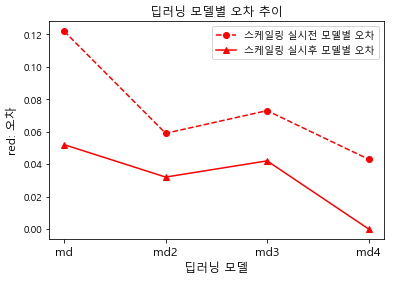

In [145]:
# 딥러닝 모델별 오차 추이

plt.plot(x_len, all_model_loss, 
         # 마커설정 옵션 'ro--'
         color = 'red', marker = 'o', linestyle = '--', 
         label = '스케일링 실시전 모델별 오차')

plt.plot(x_len, all_model_rb_loss, 
         # 마커설정 옵션 'r^-'
         color = 'red', marker = '^', linestyle = '-', 
         label = '스케일링 실시후 모델별 오차')

plt.title('딥러닝 모델별 오차 추이')
plt.xlabel('딥러닝 모델', size = 12)
plt.xticks(x_len, ['md', 'md2', 'md3', 'md4'], size = 12)
plt.ylabel('red: 오차', size = 12)
plt.legend()

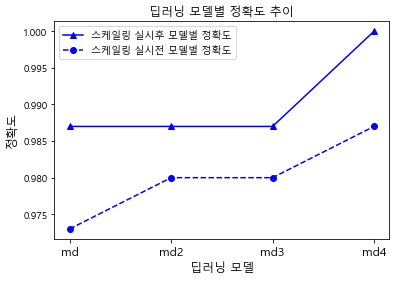

In [146]:
# 딥러닝 모델별 정확도 추이

plt.plot(x_len, all_model_rb_acc, 
         # 마커설정 옵션 'b^-'
         color = 'blue', marker = '^', linestyle = '-', 
         label = '스케일링 실시후 모델별 정확도')

plt.plot(x_len, all_model_acc, 
         # 마커설정 옵션 'bo--'
         color = 'blue', marker = 'o', linestyle = '--', 
         label = '스케일링 실시전 모델별 정확도')

plt.title('딥러닝 모델별 정확도 추이')
plt.xlabel('딥러닝 모델', size = 12)
plt.xticks(x_len, ['md', 'md2', 'md3', 'md4'], size = 12)
plt.ylabel('정확도', size = 12)
plt.legend()

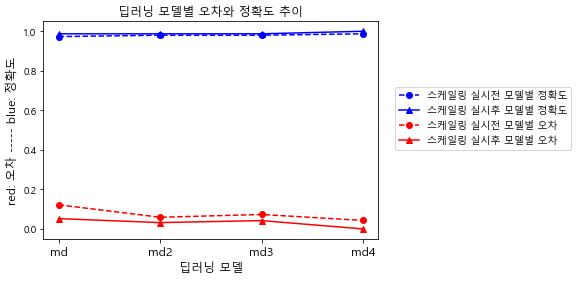

In [147]:
# 딥러닝 모델별 오차와 정확도 추이

plt.plot(x_len, all_model_acc, 'bo--', label = '스케일링 실시전 모델별 정확도')
plt.plot(x_len, all_model_rb_acc, 'b^-', label = '스케일링 실시후 모델별 정확도')

plt.plot(x_len, all_model_loss, 'ro--', label = '스케일링 실시전 모델별 오차')
plt.plot(x_len, all_model_rb_loss, 'r^-', label = '스케일링 실시후 모델별 오차')

plt.title('딥러닝 모델별 오차와 정확도 추이')
plt.xlabel('딥러닝 모델', size = 12)
plt.xticks(x_len, ['md', 'md2', 'md3', 'md4'], size = 12)
plt.ylabel('red: 오차 ----- blue: 정확도', size = 12)
plt.legend(bbox_to_anchor=(1.05, 0.7), loc=2, borderaxespad=0.)

# <font color = 'blue'>딥러닝 훈련모델 저장과 재사용</font>

* 메모리상에 생성한 딥러닝 훈련모델의 성능이 좋을 때 이를 별도 파일로 저장하고 필요시 메모리로 로딩해 재활용 할 수 있음

### 메모리상의 딥러닝 훈련모델을 파일로 저장

In [148]:
# 현재 메모리상에 있는 훈련모델 객체 중 베스트모델을 하드디스크에 저장
md4_rb.save('iris_md4_rb.h5')

# - .h5확장자: HDF 파일포맷(Hierarchical Data Format: 계층적 데이터 형식)
# - 대용량 데이터저장과 빠른 검색속도를 지원하는 포맷임

In [149]:
# 하드디스크에 저장된 훈련모델 객체 파일 확인
import glob

glob.glob('*.h5')

['iris_md4_rb.h5']

### 메모리상의 딥러닝 훈련모델 삭제

In [150]:
# 현재 메모리상에 있던 특정객체 삭제
del md4_rb

In [151]:
# 현재 메모리 객체목록 확인
%whos

Variable                Type            Data/Info
-------------------------------------------------
Dense                   type            <class 'keras.layers.core.Dense'>
LabelEncoder            type            <class 'sklearn.preproces<...>sing.label.LabelEncoder'>
MinMaxScaler            type            <class 'sklearn.preprocessing.data.MinMaxScaler'>
RobustScaler            type            <class 'sklearn.preprocessing.data.RobustScaler'>
Sequential              type            <class 'keras.engine.sequential.Sequential'>
StandardScaler          type            <class 'sklearn.preproces<...>ing.data.StandardScaler'>
X                       DataFrame            sepal_length  sepal_<...>n\n[150 rows x 4 columns]
X_arr                   ndarray         150x4: 600 elems, type `object`, 4800 bytes
X_mm                    ndarray         150x4: 600 elems, type `float64`, 4800 bytes
X_mm_df                 DataFrame            sepal_length  sepal_<...>n\n[150 rows x 4 columns]
X_rb    

### 하드디스크에 있는 딥러닝 훈련모델 파일을 메모리로 로딩

In [152]:
from keras.models import load_model
md4_rb = load_model('iris_md4_rb.h5')

### 로딩한 훈련모델 재사용

In [153]:
# 별도의 테스트셋이 있을 때 베스트훈련모델의 과적합가능성 검증/테스트
md4_rb_test_perf = md4_rb.evaluate(X_rb_df, y_ohe)
md4_rb_test_loss = md4_rb_test_perf[0]
md4_rb_test_acc = md4_rb_test_perf[1]

print('테스트셋 성능종합:', [round(i, 3) for i in md4_rb_test_perf])
print(f'테스트셋 오차(loss): {md4_rb_test_loss:0.3f}')
print(f'테스트셋 정확도(accuracy): {md4_rb_test_acc:0.3f}')

150/150 [==============================] - 0s 1ms/step
테스트셋 성능종합: [0.0, 1.0]
테스트셋 오차(loss): 0.000
테스트셋 정확도(accuracy): 1.000


# <font color = 'blue'>선정된 딥러닝모델 예측목적 사용</font>

* 비교한 여러 딥러닝 분류모형 중 가장 성능이 우수한 모델을 가지고 새로운 데이터셋을 이용해 분류예측을 실시함
* 베스트모델이 스케일링된 피처셋을 사용해서 만든 것이므로 새로운 데이터셋도 스케일링을 동일하게 실시해야함

### 예측대상 새로운 데이터셋 로딩

In [154]:
# 새로운 분류대상 데이터셋 로딩
dfn = pd.read_csv('./../../data/iris_new.csv')
print(dfn.shape)

dfn.head()
# - 타겟변수가 없는 피처셋으로만 구성되어 있음
# - 주어진 피처셋으로 타겟변수 예측을 해야함

(45, 4)


,sepal_length,sepal_width,petal_length,petal_width
0,5.3,3.7,1.5,0.2
1,6.8,2.8,4.8,1.4
2,4.7,3.2,1.6,0.2
3,6.4,3.1,5.5,1.8
4,6.6,3.0,4.4,1.4


### 새로운 데이터셋 특성파악

In [155]:
# 피처셋 정보확인
dfn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 4 columns):
sepal_length    45 non-null float64
sepal_width     45 non-null float64
petal_length    45 non-null float64
petal_width     45 non-null float64
dtypes: float64(4)
memory usage: 1.5 KB


In [156]:
# 피처셋 기술통계분석
dfn.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,45.000000,45.000000,45.000000,45.000000
mean,5.986667,3.097778,3.828889,1.191111
std,0.878687,0.433531,1.769774,0.745234
min,4.500000,2.300000,1.200000,0.100000
25%,5.300000,2.800000,1.700000,0.300000
50%,5.800000,3.000000,4.500000,1.400000
75%,6.600000,3.300000,5.100000,1.800000
max,7.900000,4.100000,6.700000,2.400000


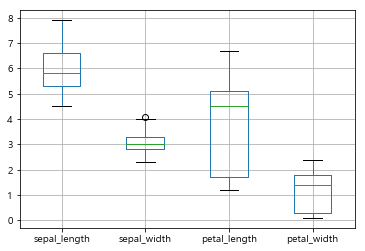

In [157]:
# 박스플롯을 이용한 피처셋 특성비교
dfn.boxplot()
# - 기본적인 데이터의 중심성, 변동성이 다르며
#   일부피처에 아웃라이어도 존재

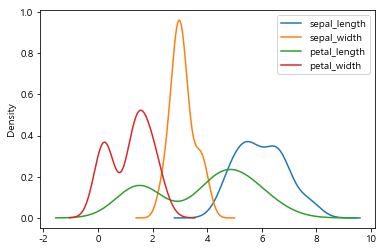

In [158]:
# 밀도곡선을 이용한 피처셋 특성비교
dfn.plot.kde()
# - 특정피처의 데이터분포가 상당히 이질적임을 알 수 있음

#### 피처셋 스케일링
* sklearn라이브러리 preprocessing모듈의 스케일링 함수 이용 최대/최소값이 각각 1, 0이 되도록 스케일링

In [159]:
# sklearn 라이브러리의 스케일링관련 모듈로딩
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [160]:
# 표준정규화 스케일링
scaler = StandardScaler()
dfn_st = scaler.fit_transform(dfn)
dfn_st[0:5]

array([[-0.79029942,  1.40480523, -1.33079392, -1.3449607 ],
       [ 0.93608281, -0.69462694,  0.55492075,  0.28346705],
       [-1.48085232,  0.23845402, -1.27365105, -1.3449607 ],
       [ 0.47571422,  0.00518378,  0.95492083,  0.8262763 ],
       [ 0.70589851, -0.22808646,  0.32634927,  0.28346705]])

In [161]:
# 표준정규화 스케일링 결과확인
dfn_st_df = pd.DataFrame(X_st, columns = ['sepal_length', 'sepal_width', 
                                            'petal_length', 'petal_width'])
dfn_st_df.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977


In [162]:
# 최대최소를 1과 0으로 하는 스케일링
scaler = MinMaxScaler()
dfn_mm = scaler.fit_transform(dfn)
dfn_mm[0:5]

array([[0.23529412, 0.77777778, 0.05454545, 0.04347826],
       [0.67647059, 0.27777778, 0.65454545, 0.56521739],
       [0.05882353, 0.5       , 0.07272727, 0.04347826],
       [0.55882353, 0.44444444, 0.78181818, 0.73913043],
       [0.61764706, 0.38888889, 0.58181818, 0.56521739]])

In [163]:
# 최대최소를 1과 0으로 하는 스케일링 결과확인
dfn_mm_df = pd.DataFrame(dfn_mm, columns = ['sepal_length', 'sepal_width', 
                                            'petal_length', 'petal_width'])
dfn_mm_df.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,0.235294,0.777778,0.054545,0.043478
1,0.676471,0.277778,0.654545,0.565217
2,0.058824,0.500000,0.072727,0.043478


In [164]:
# 이상치분포를 보정한 스케일링
scaler = RobustScaler()
dfn_rb = scaler.fit_transform(dfn)
dfn_rb[0:5]

array([[-0.38461538,  1.4       , -0.88235294, -0.8       ],
       [ 0.76923077, -0.4       ,  0.08823529,  0.        ],
       [-0.84615385,  0.4       , -0.85294118, -0.8       ],
       [ 0.46153846,  0.2       ,  0.29411765,  0.26666667],
       [ 0.61538462,  0.        , -0.02941176,  0.        ]])

In [165]:
# 이상치분포를 보정한 스케일링 결과확인
dfn_rb_df = pd.DataFrame(dfn_rb, columns = ['sepal_length', 'sepal_width', 
                                            'petal_length', 'petal_width'])
dfn_rb_df.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,-0.384615,1.4,-0.882353,-0.8
1,0.769231,-0.4,0.088235,0.0
2,-0.846154,0.4,-0.852941,-0.8


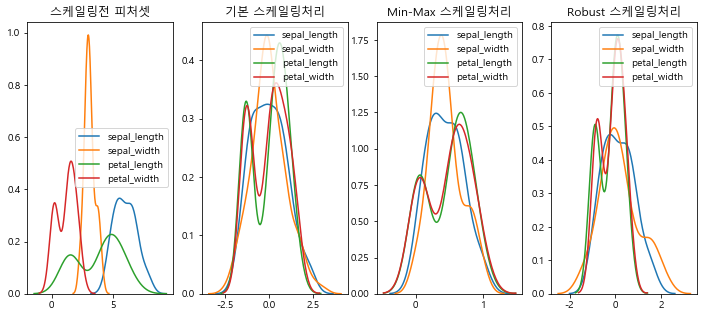

In [166]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize = (12, 5))

ax1.set_title('스케일링전 피처셋')
for i in X.columns:
    sns.kdeplot(dfn[i], ax=ax1)

ax2.set_title('기본 스케일링처리')
for i in X.columns:
    sns.kdeplot(dfn_st_df[i], ax=ax2)
    
ax3.set_title('Min-Max 스케일링처리')
for i in X.columns:
    sns.kdeplot(dfn_mm_df[i], ax=ax3)
    
ax4.set_title('Robust 스케일링처리')
for i in X.columns:
    sns.kdeplot(dfn_rb_df[i], ax=ax4)
    
# - Robust 스케일링처리 결과가 가장 피처셋의 분포를 전체적으로 통일시켜주었음 

In [167]:
# Robust 스케일링처리된 피처셋의 기술통계
dfn_rb_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,45.000000,45.000000,45.000000,45.000000
mean,0.143590,0.195556,-0.197386,-0.139259
std,0.675913,0.867063,0.520522,0.496823
min,-1.000000,-1.400000,-0.970588,-0.866667
25%,-0.384615,-0.400000,-0.823529,-0.733333
50%,0.000000,0.000000,0.000000,0.000000
75%,0.615385,0.600000,0.176471,0.266667
max,1.615385,2.200000,0.647059,0.666667


### 예측모델에 새로운 데이터셋 피팅

#### md.predict_classes() 메서드를 이용한 예측: 예측결과가 클래스 레이블별 정수숫자로 나옴

In [168]:
# 예측을 클래스 레이블수치로 도출 
dfn_rb_class = md4_rb.predict_classes(dfn_rb)
dfn_rb_class
# - 이 분류예측 정보를 최종적으로 사용하면 됨

array([0, 1, 0, 2, 1, 1, 2, 0, 1, 0, 2, 0, 0, 1, 2, 0, 1, 2, 2, 2, 2, 1,
       0, 2, 1, 1, 2, 0, 0, 0, 0, 0, 2, 0, 1, 1, 2, 1, 1, 2, 2, 0, 1, 1,
       1], dtype=int64)

#### md.predict_proba() 메서드를 이용한 예측: 예측결과가 클래스 레이블별 확률값으로 나옴

In [169]:
# 예측을 클래스 확률값으로 도출
dfn_rb_proba = md4_rb.predict_proba(dfn)
dfn_rb_proba[0:10]

array([[6.9024894e-20, 1.7784801e-07, 9.9999988e-01],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [2.4047855e-22, 6.7048049e-15, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [3.5724509e-20, 2.4642208e-09, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [1.4718796e-19, 9.9997234e-01, 2.7619479e-05]], dtype=float32)

#### md.predict() 메서드를 이용한 예측: 예측결과가 클래스 레이블별 "확률값"으로 나옴

In [171]:
# 새로운 피처셋을 성능비교에서 가장우수한 분류예측 모델에 피팅
dfn_rb_prob = md4_rb.predict(dfn_rb)

print(type(dfn_rb_prob), dfn_rb_prob.shape)
dfn_rb_prob[0:10]
# - 예측결과는 개별 레코드별로 0 ~ 1 사이의 "확률값"으로 나옴
# - 0.5를 기준으로 1에 가까울수록 1로, 0에 가까울수록 0으로 판단

<class 'numpy.ndarray'> (45, 3)


array([[1.0000000e+00, 4.0372157e-08, 9.5116265e-13],
       [6.4921095e-09, 1.0000000e+00, 1.7662840e-08],
       [9.9999988e-01, 3.0183624e-09, 1.3151775e-07],
       [4.0161840e-06, 1.1700165e-03, 9.9882597e-01],
       [3.3463867e-09, 1.0000000e+00, 3.4354967e-11],
       [1.8589787e-08, 1.0000000e+00, 4.5133458e-10],
       [1.8440147e-05, 4.7359213e-02, 9.5262241e-01],
       [1.0000000e+00, 1.0281717e-08, 1.0662148e-09],
       [7.1163231e-05, 9.9992466e-01, 4.1872681e-06],
       [9.9999702e-01, 2.9901662e-06, 2.3524868e-16]], dtype=float32)

### 예측된 각 관찰치별 확률값 중에서 각장 큰 확률값을 가지는 위치에 0, 1, 2 부여함

In [ ]:
# 다차원배열객체에서 가로/세로방향으로 가장 큰 수치가 위치한 인덱스 번호찾기

max_row_loc = np.argmax(dfn_rb_prob, axis = 0)
print(max_row_loc)
# - axis = 0 가로방향으로 가면서, 즉 각 열별로 가장 큰 숫자가 위치한 인덱스찾기 

max_col_loc = np.argmax(dfn_rb_prob, axis = 1)
# - axis = 1 세로방향으로 내려가면서, 즉 각 행별로 가장 큰 숫자가 위치한 인덱스찾기 
print(max_col_loc)

### 타겟변수 클래스별 빈도와 비율 분포

In [ ]:
# 분류결과 타겟변수로 데이터셋에 추가 
dfn['class'] = dfn_rb_class
dfn.head()

In [ ]:
# 타겟변수 클래스 레이블 붙이기
dfn['class2'] = dfn['class'].map({0:'Iris-setosa', 1:'Iris-versicolor', 2:'Iris-virginica'})
dfn['class2'] = dfn['class2'].astype('category')
dfn.head()

In [ ]:
for csn, csl, csv in zip(dfn['class'].unique(), dfn['class2'].unique(), dfn['class'].value_counts()):
    pct = csv / dfn['class'].value_counts().sum() 
    print(f"레이블 {csn:d}: {csl:15s}, 빈도수: {csv:d}, 비율: {pct:0.3f}") 

# End of Source